In [19]:
%matplotlib inline
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.append(('\\').join(os.getcwd().split('\\')[:-2]))
from hawkes import dataLoader
import numpy as np
import time

In [20]:
import pickle

In [21]:
stocks = ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT','AAPL','ABBV', 'PM','IBM','TSLA','CHTR','AMZN', 'GOOG', 'BKNG']

# shape

In [4]:
dates = [dt.date(2019,1,2), dt.date(2019,12,31)]

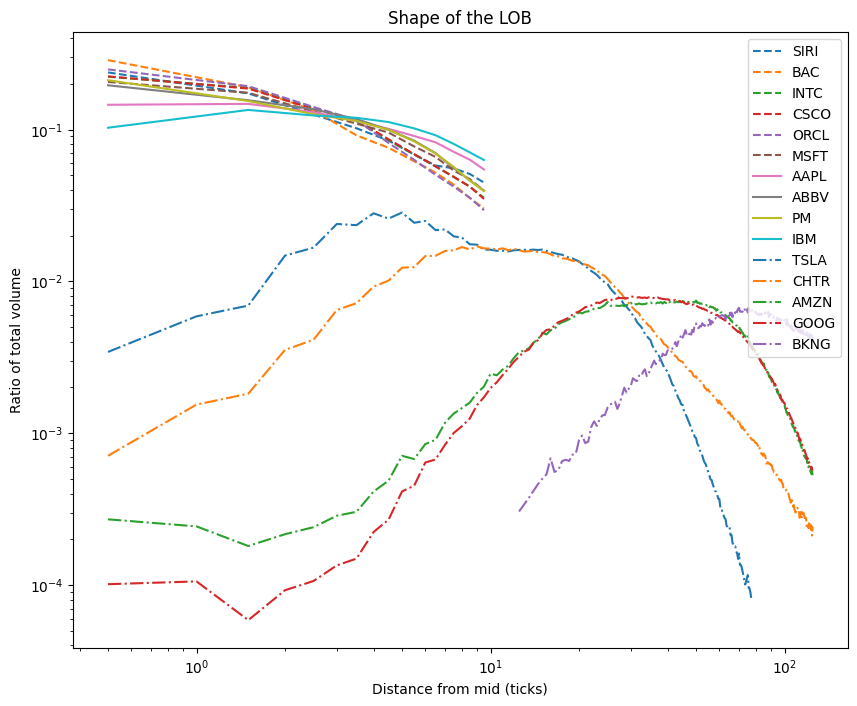

In [10]:
plt.figure(figsize=(10,8))
for s in stocks:
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_Shape", "rb") as f:
        data = pickle.load(f)
    key0 = list(data.keys())[0]
    x, y = [], []
    for k in range(1,250):
        if (data.get(k, None) is not None)and(len(data.get(k, [])) == len(data[key0])):
            x+= [k]
    x = np.array(x)
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        x = x[0:-1:2]
        # print(x)
        x = [i for i in x if i <= 20]
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        x = x[0:-1:2]
        x = [i for i in x if i <= 20]
        linestyle = "-"
    else:
        linestyle = "-."
    x = np.array(x)
    plt.plot(x/2, [np.average(data[k]) for k in x]/(np.sum([np.average(data[k]) for k in x])),  linestyle, label = s)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc = "upper right")
plt.ylabel("Ratio of total volume")
plt.xlabel("Distance from mid (ticks)")
plt.title("Shape of the LOB")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_shape_2019.png")
plt.show()

# maxima of shape : dynamics

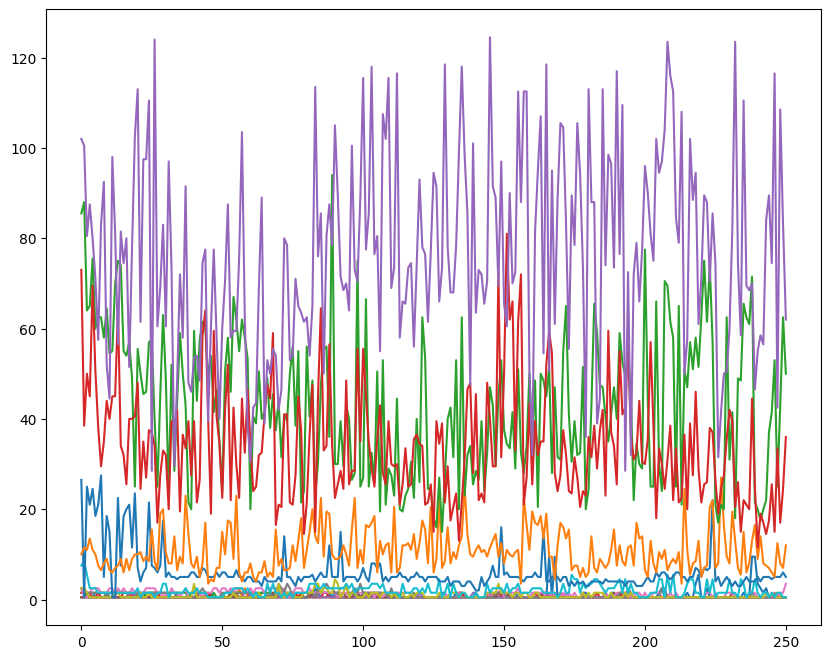

In [4]:
plt.figure(figsize=(10,8))
for s in stocks:
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_Shape", "rb") as f:
        data = pickle.load(f)
    key0 = list(data.keys())[0]
    x, y = [], []
    for k in range(1,250):
        if (data.get(k, None) is not None)and(len(data.get(k, [])) == len(data[key0])):
            x+= [k]
    x = np.array(x)
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        x = x[0:-1:2]
        # print(x)
        x = [i for i in x if i <= 20]
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        x = x[0:-1:2]
        x = [i for i in x if i <= 20]
        linestyle = "-"
    else:
        linestyle = "-."
    x = np.array(x)
    y = np.array([data[k] for k in x])
    maxima = (x/2)[np.argmax(y, axis=0)] 
    plt.plot(maxima)
# plt.yscale("log")
# plt.xscale("log")
# plt.legend(loc = "upper right")
# plt.ylabel("Ratio of total volume")
# plt.xlabel("Distance from mid (ticks)")
# plt.title("Shape of the LOB")
# plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_shape_2019.png")
plt.show()

In [23]:
a = np.zeros(int(max(x/2))+1)
a[(x/2).astype(int)] = y[:,0]

FileNotFoundError: [Errno 2] No such file or directory: '/SAN/fca/Konark_PhD_Experiments/smallTick/MSFT_EDA_shapeMaxima'

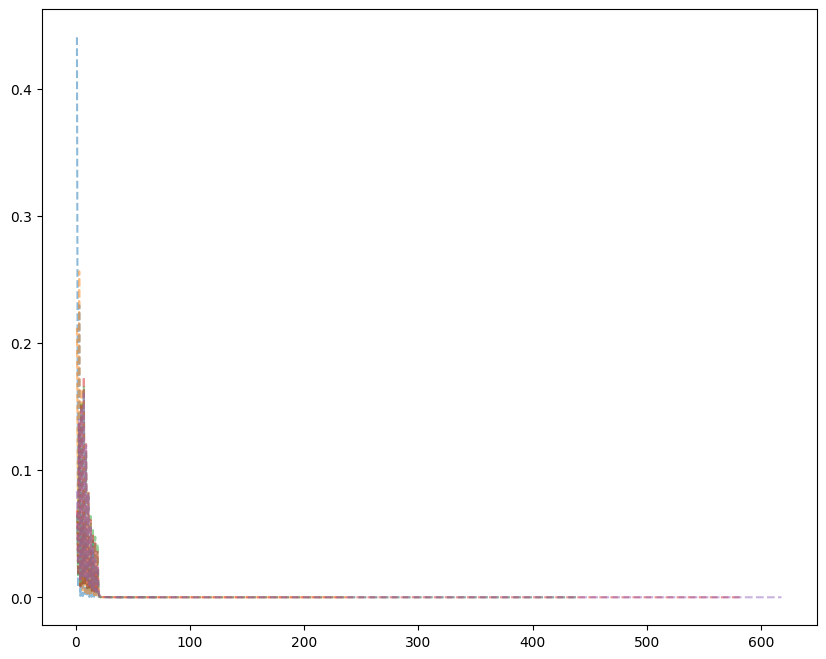

In [148]:
plt.figure(figsize=(10,8))
for s in stocks:
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_shapeMaxima", "rb") as f:
            maxima = pickle.load(f)
    
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        
        linestyle = "-"
    else:
        linestyle = "-."
    k = np.sort(np.array(list(maxima.keys())))
    v = np.array([maxima[c] for c in k])
    v = v/v.sum()
    plt.plot(k, v, linestyle, label = s, alpha = 0.5)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc = "upper right")
plt.ylabel("Probability")
plt.xlabel("Distance from mid (ticks)")
plt.title("PDF of Maxima of Shape of the LOB ")
# plt.title("Shape of the LOB")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_shapeMaxima_2019.png")
plt.show()

# Sparsity

In [22]:
with open("/SAN/fca/Konark_PhD_Experiments/smallTick/BKNG_EDA_shapeWasserstein", "rb") as f:
        data = pickle.load(f)

In [ ]:
data[1]

SIRI 0.0889080223283721 0.542652297816141 0.8837978913297122 1.1001067030876786 0.8236708539555967 
BAC 0.0 0.41895229260121947 0.5168622188062441 0.6229106280306059 0.5233473778449417 
INTC 0.0 0.3953267428336549 0.34577679832575314 0.5251413147165395 0.38853303759504987 
CSCO 0.0 0.38929827889421864 0.2920484496580447 0.532770777049346 0.3395348058488077 
ORCL 0.0 0.45315988709471416 0.33115695063452355 0.43045407382353235 0.5188468715888352 
MSFT 0.11080425486193929 0.1493891096354795 0.42767026866577423 0.32813548128943065 0.37441721512257314 
AAPL 0.21002478650354106 0.31471581925309167 0.4286804454772044 0.512854399034438 0.46246898003983716 
ABBV 0.28387677334380174 0.3806918320788762 0.5487460290603056 0.6987291386282015 0.8531200643664963 
PM 0.2650375761045086 0.40277485483722514 0.6119008320081373 0.8404533323039967 1.0697118416062494 
IBM 0.3874898841811138 0.6620562207168292 1.0427521024250925 1.3609645725969515 1.6527527225930372 
TSLA 1.4060330499799465 2.631301435052105

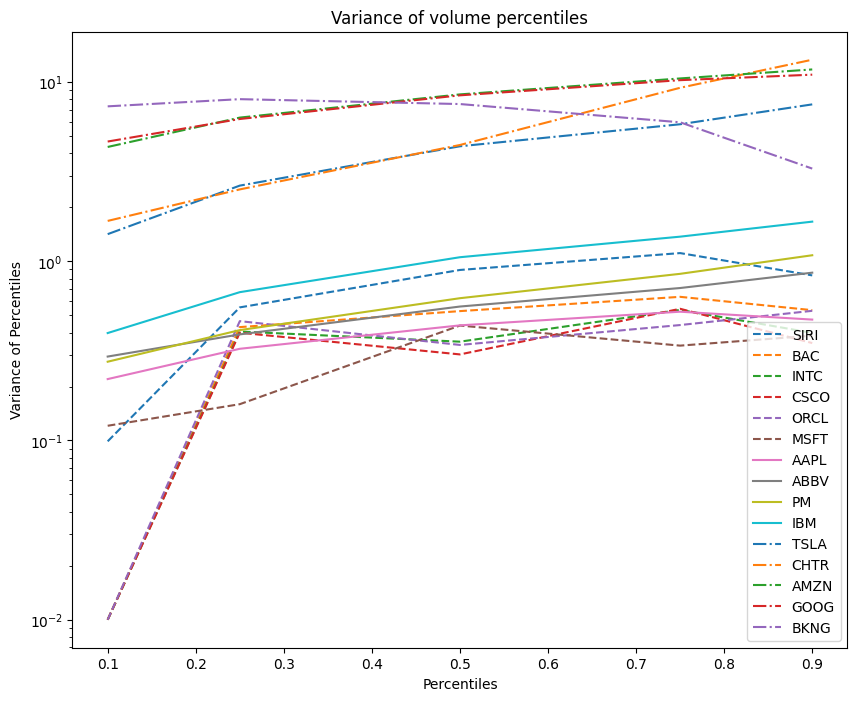

In [51]:
plt.figure(figsize=(10,8))
for s in stocks:
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_ShapePctiles", "rb") as f:
        data = pickle.load(f)
    pctiles = [0.1, 0.25, 0.5, 0.75, 0.9]
    variances = [np.std(data[p]) for p in pctiles]
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        linestyle = "-"
    else:
        linestyle = "-."
    print(s, "".join([str(v) + " " for v in variances]))
    plt.plot(pctiles, np.array(variances) + 1e-2, linestyle, label = s)
plt.yscale("log")
# plt.xscale("log")
plt.legend(loc = "lower right")
plt.ylabel("Variance of Percentiles")
plt.xlabel("Percentiles")
plt.title("Variance of volume percentiles")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_sparsity_2019.png")
plt.show()

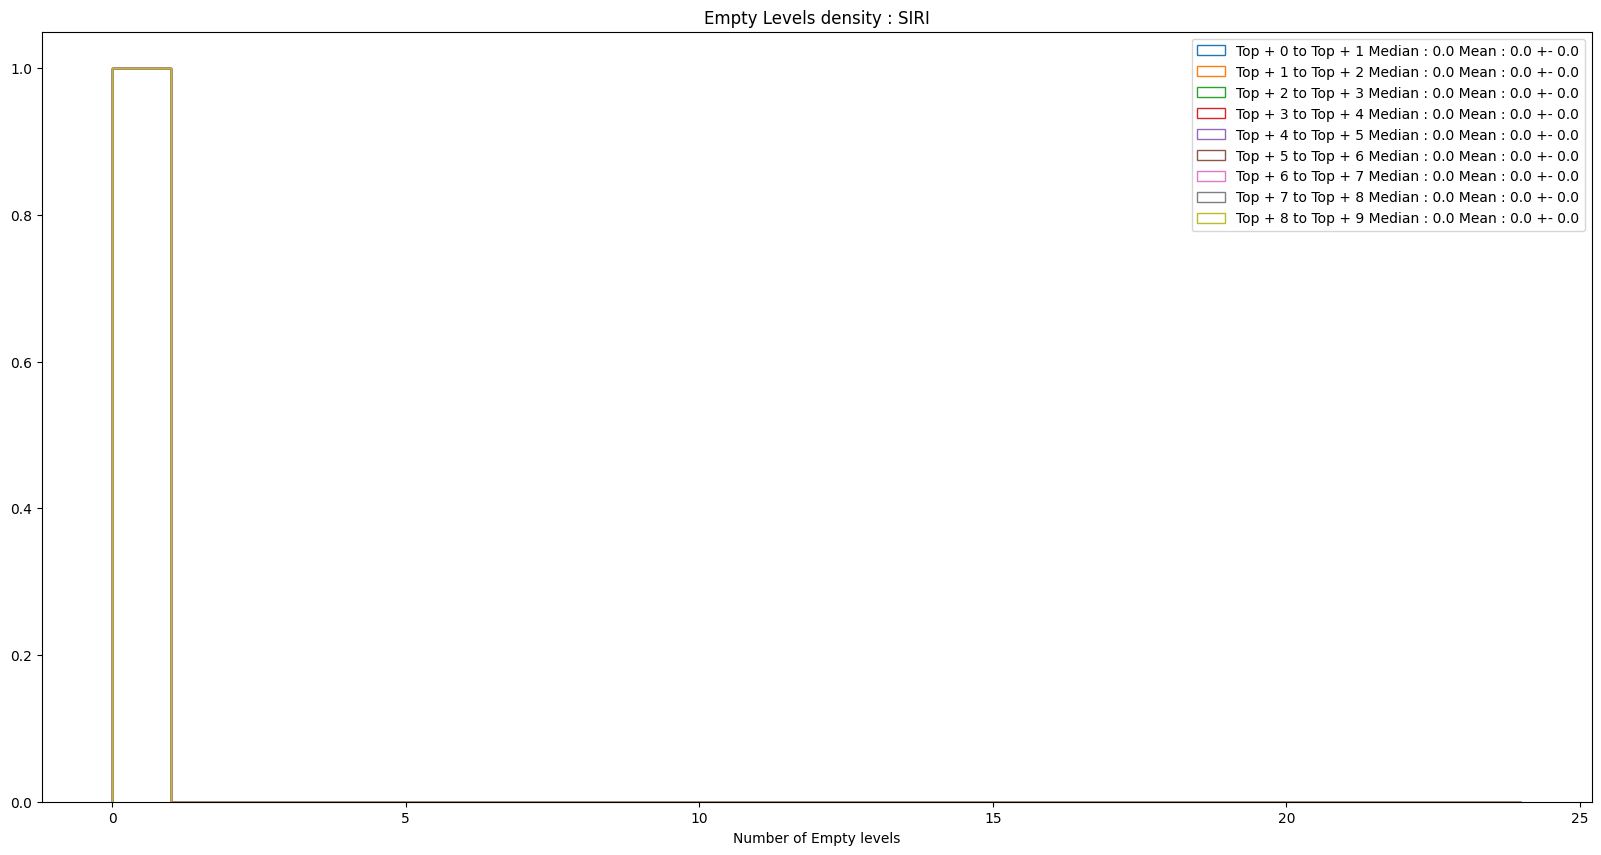

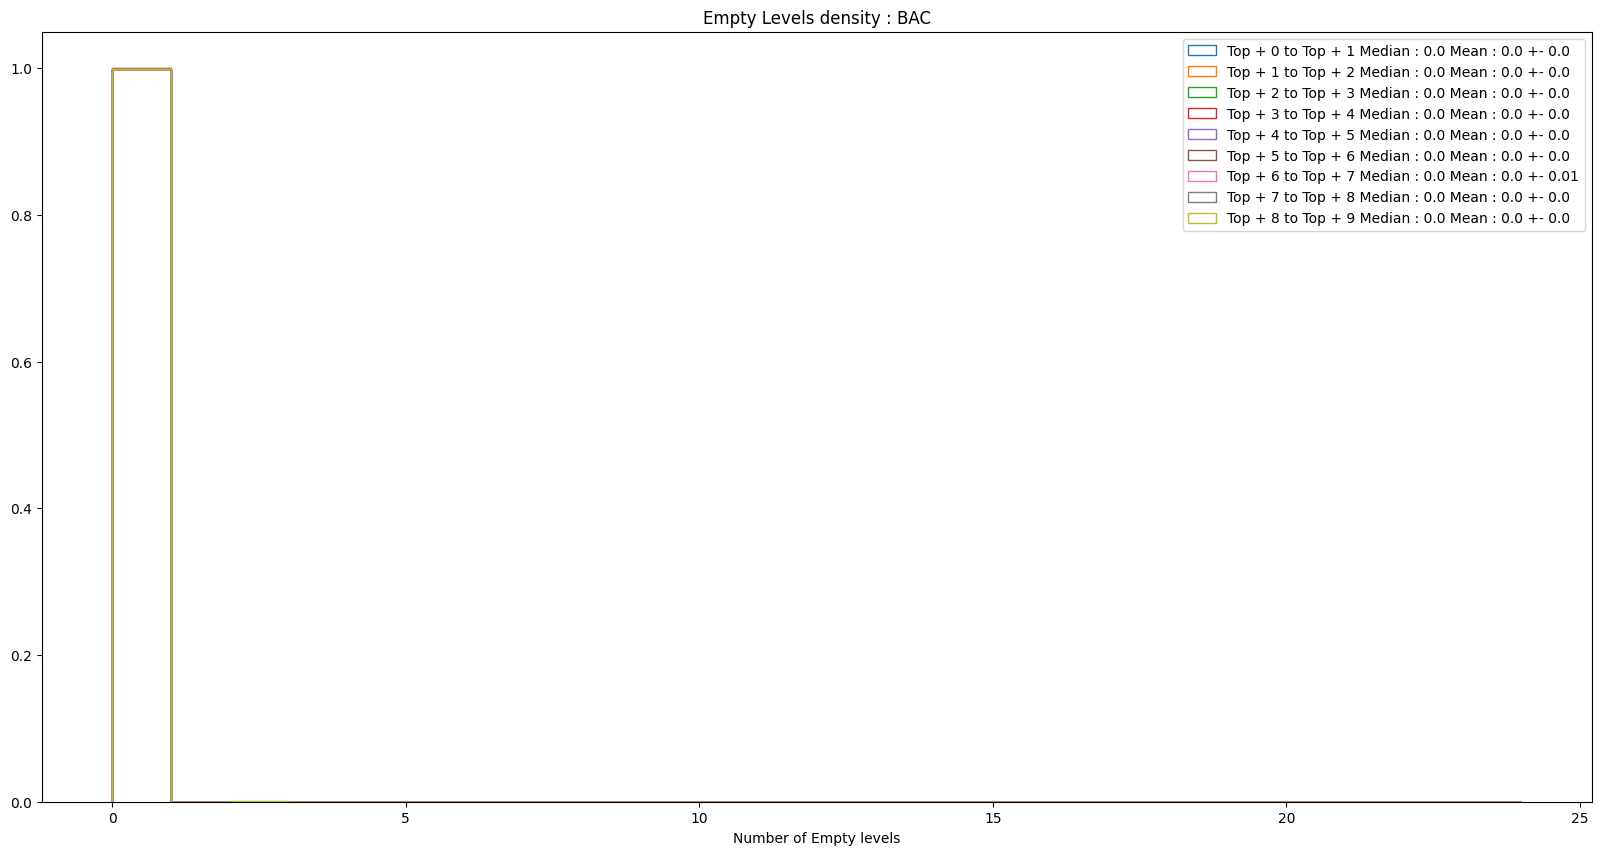

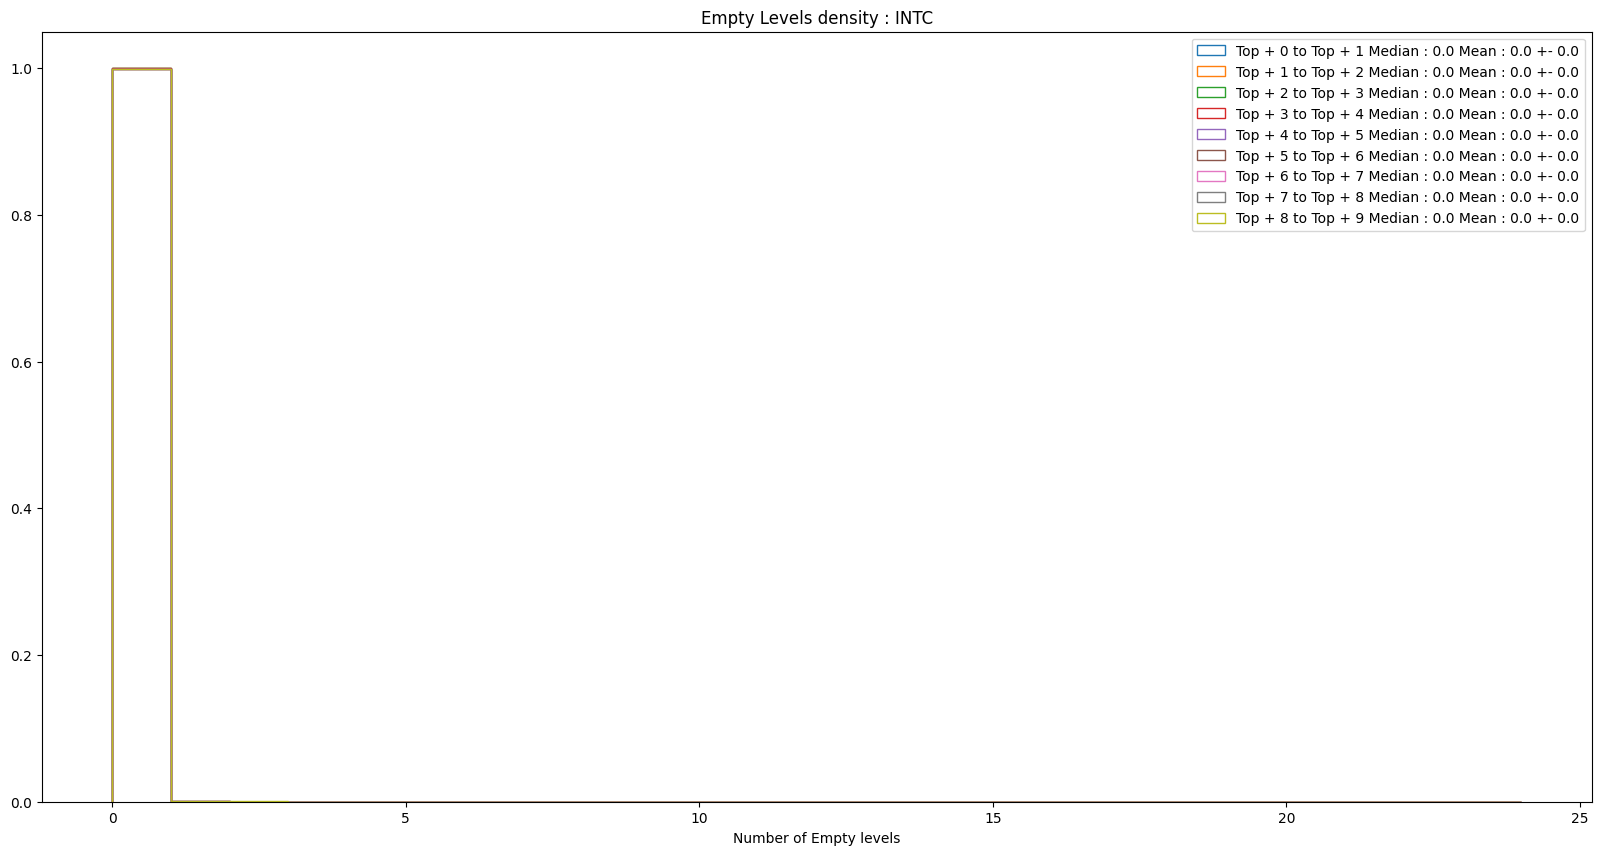

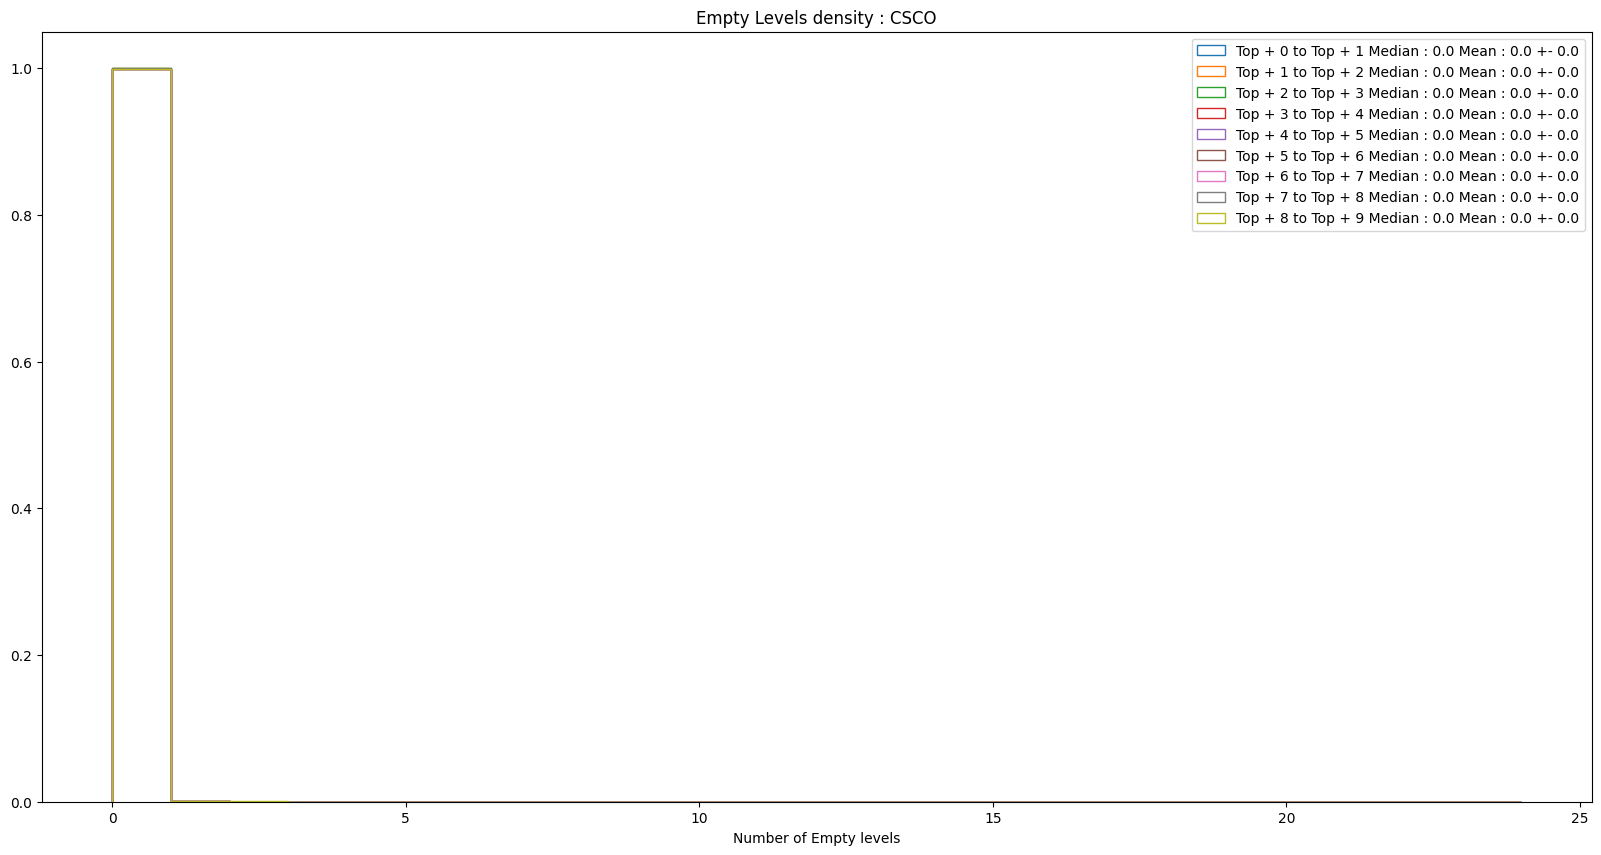

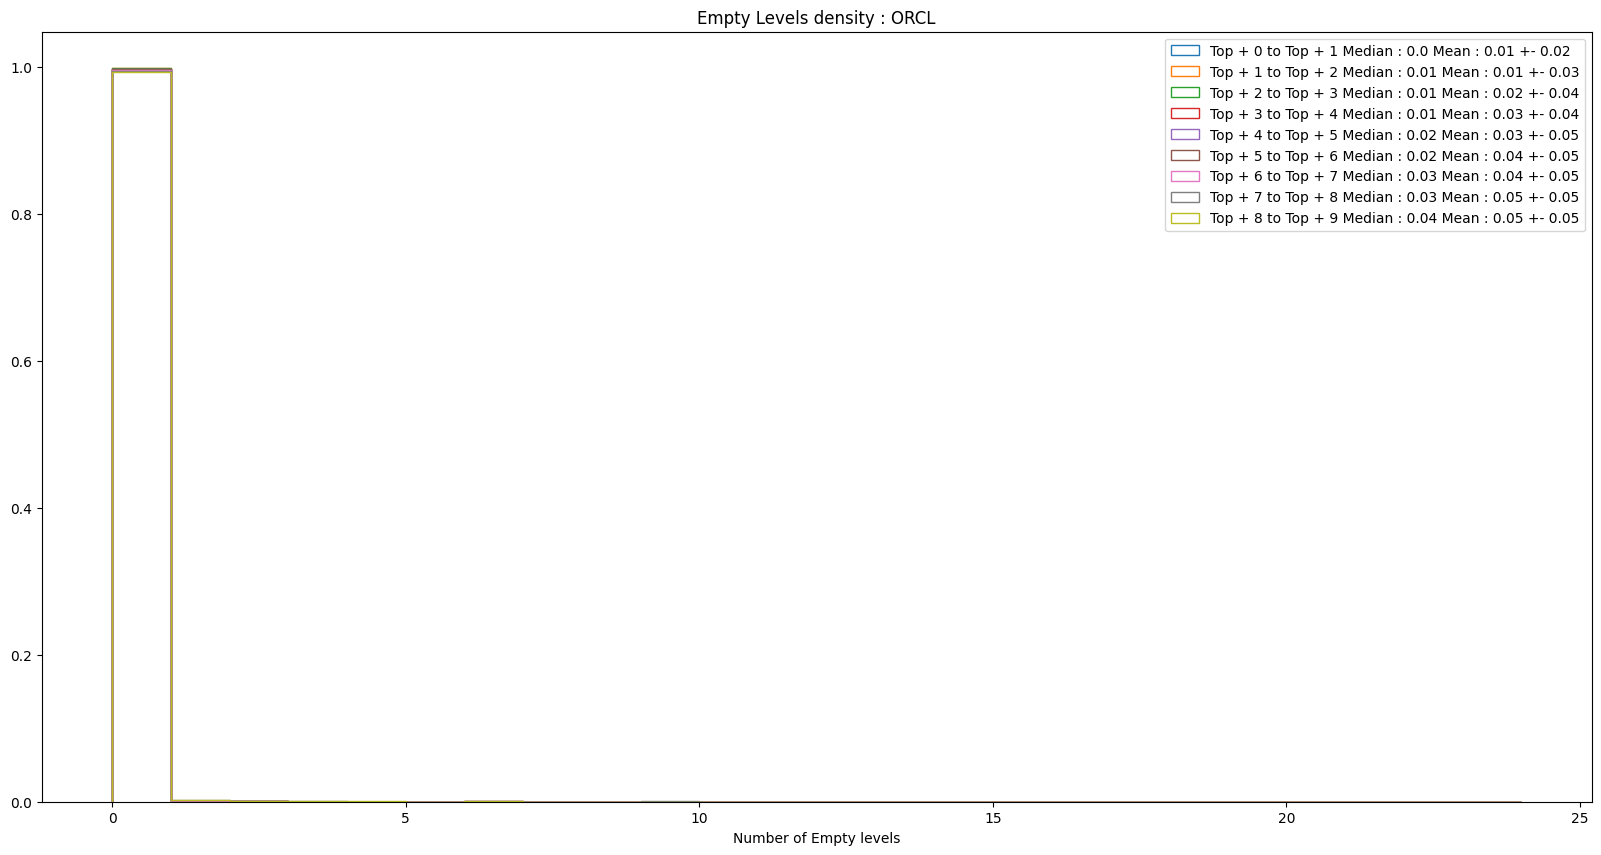

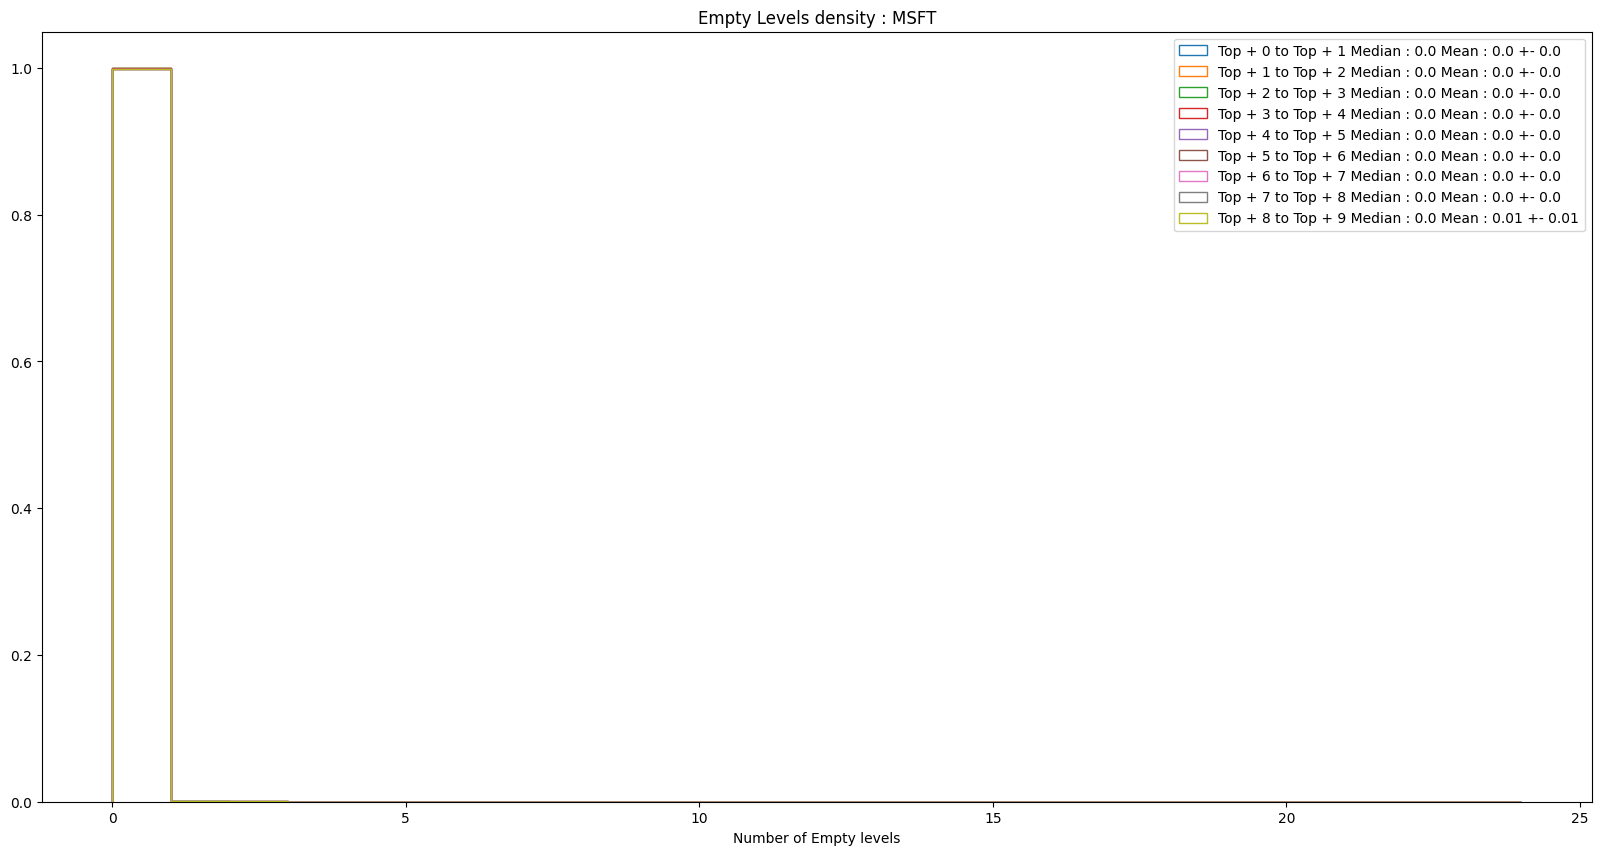

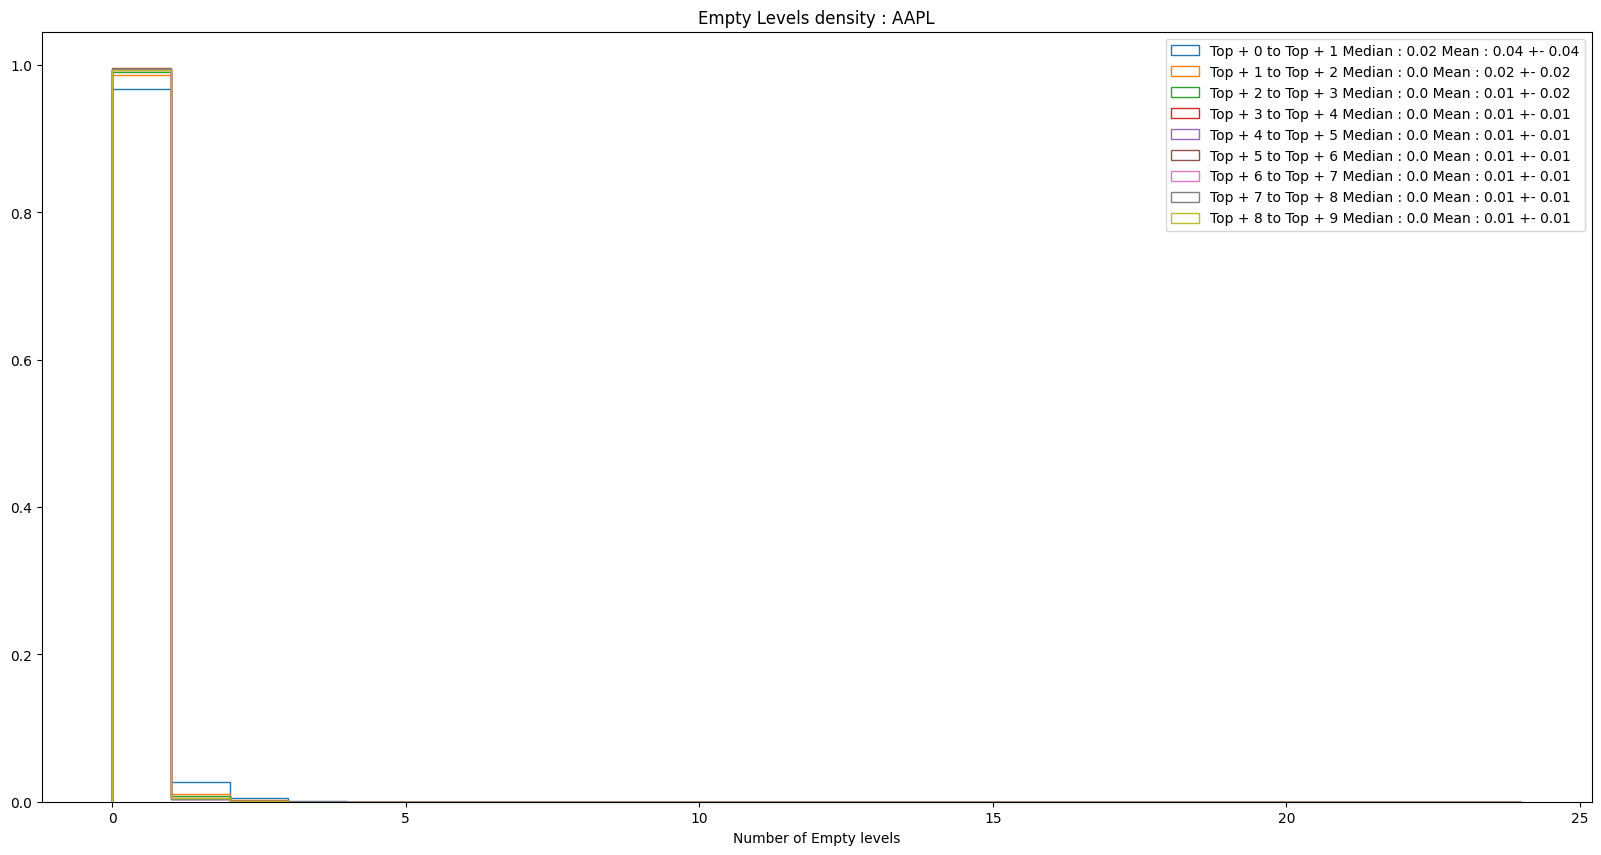

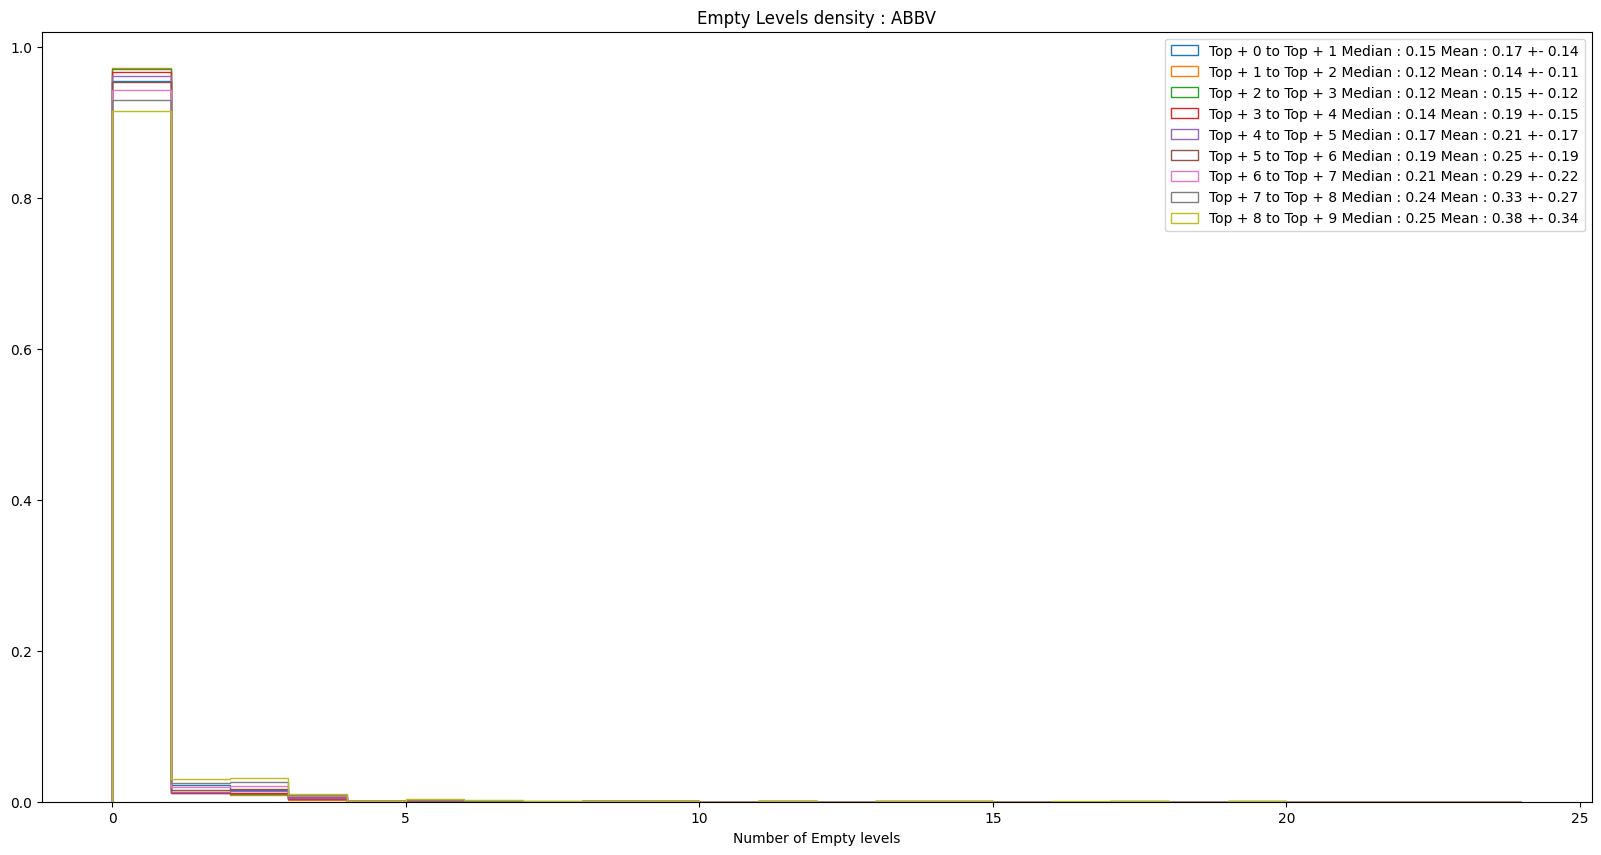

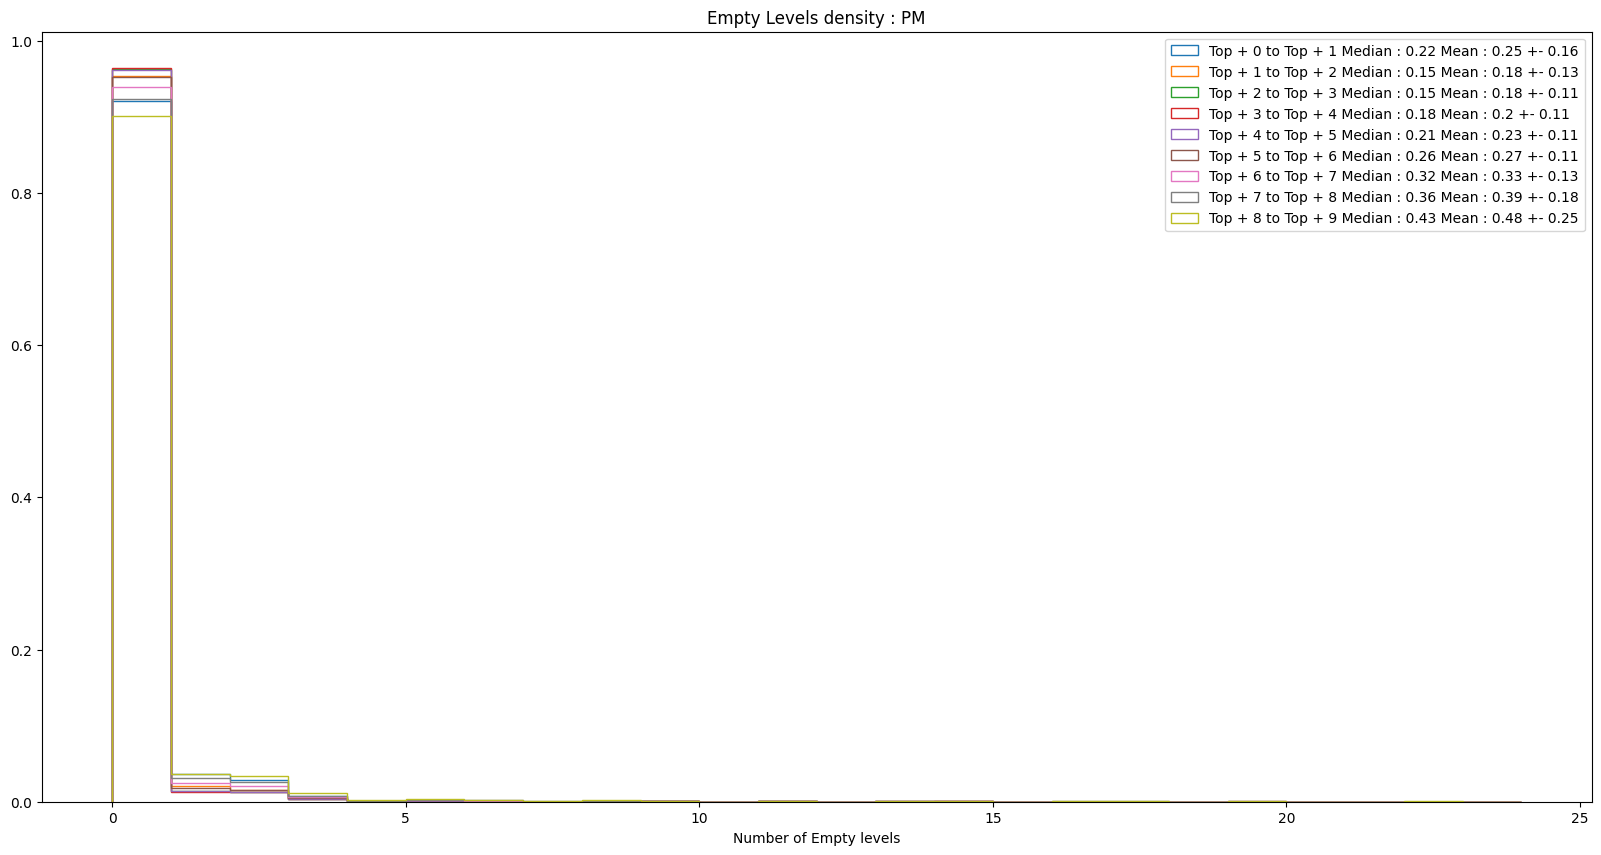

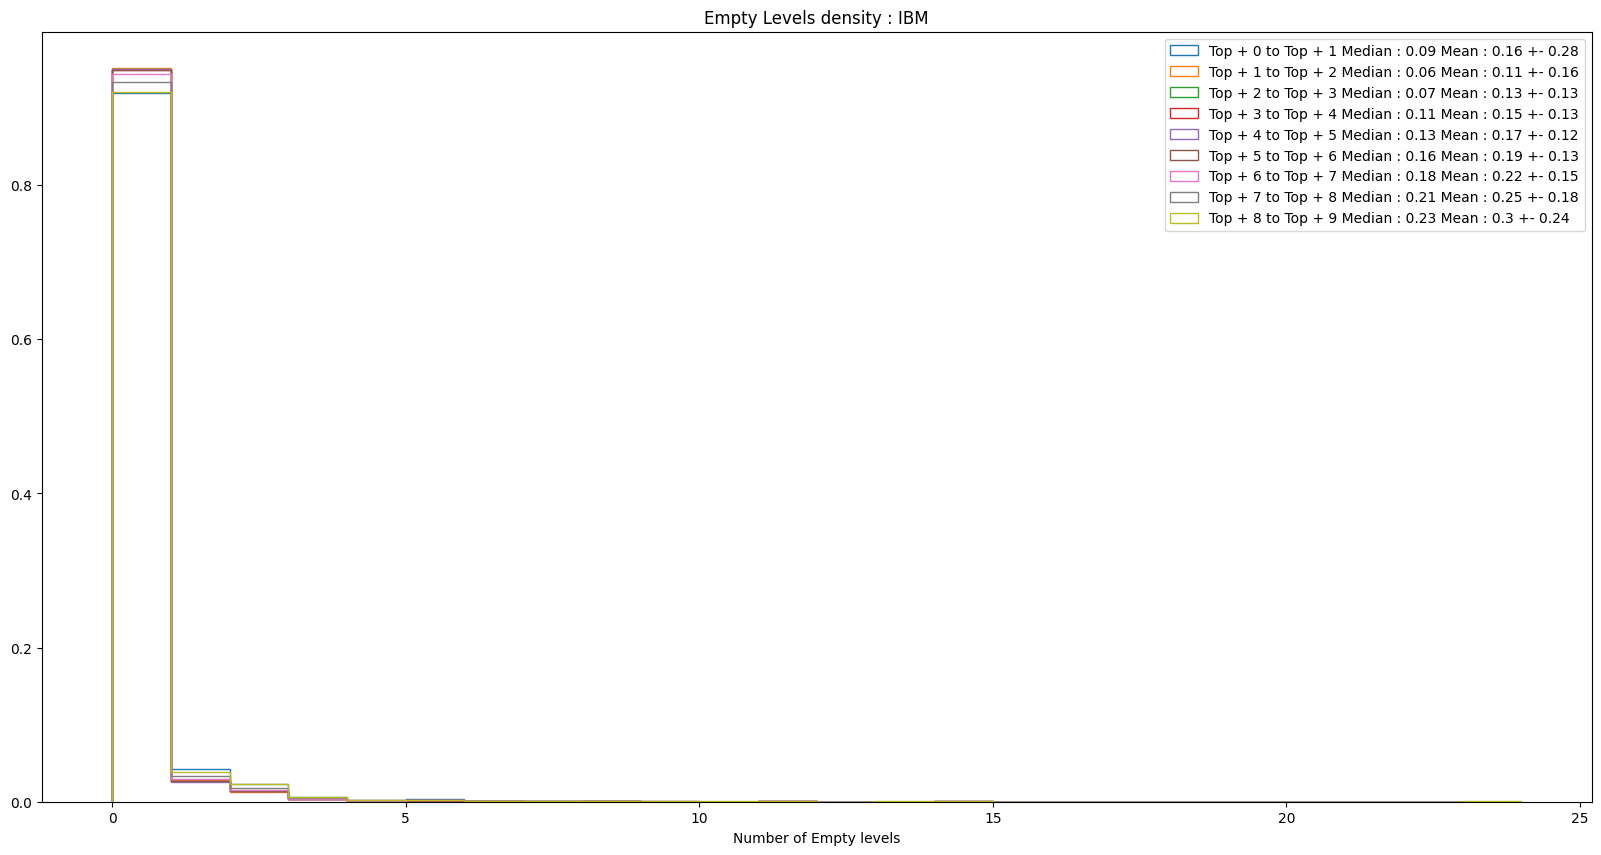

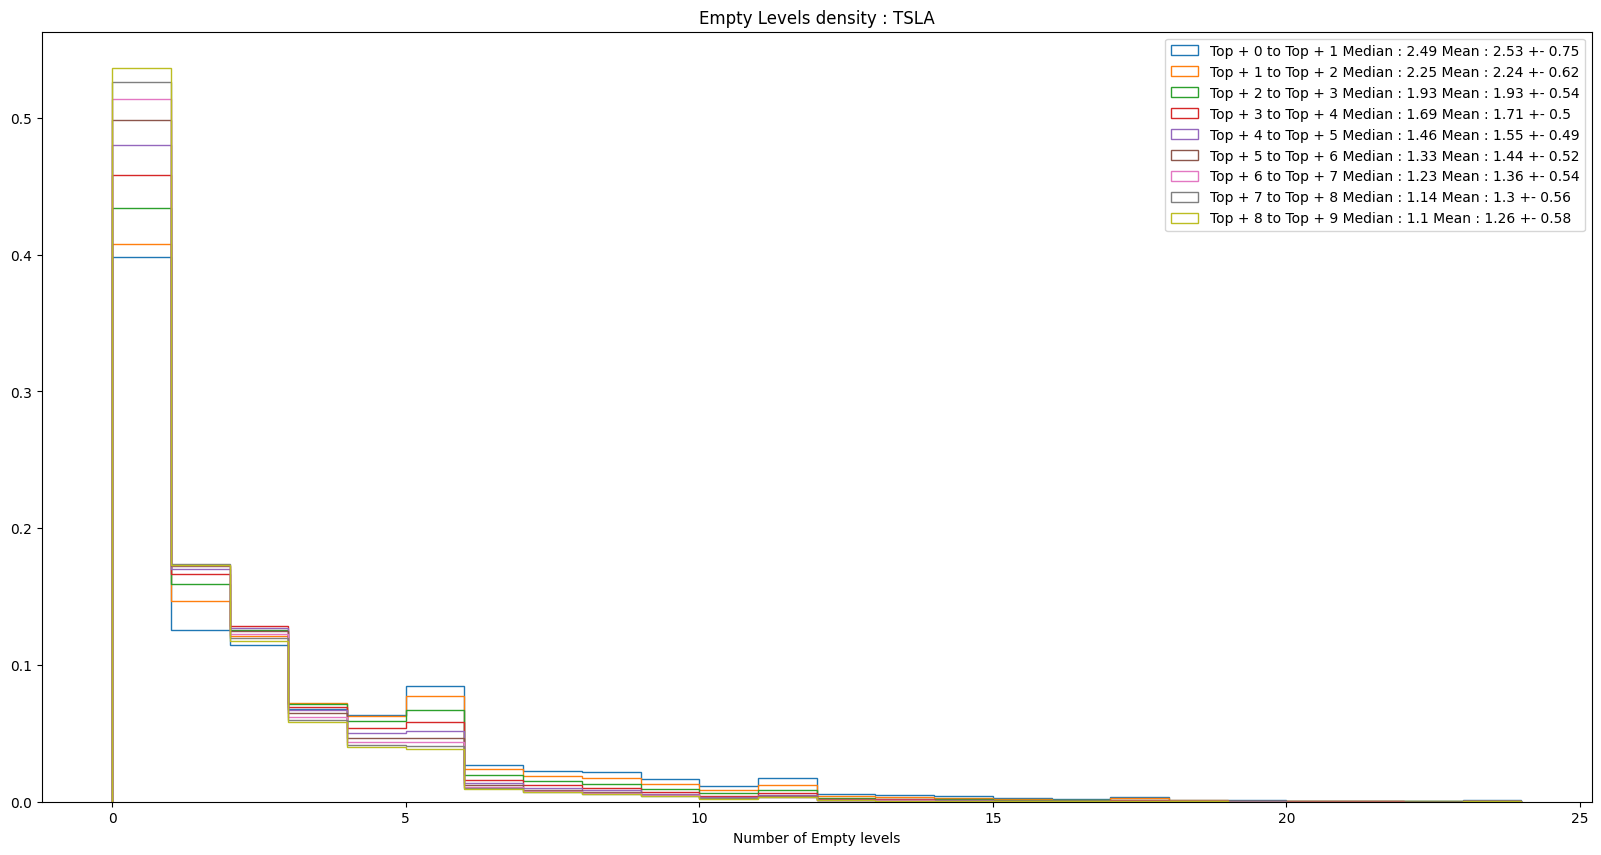

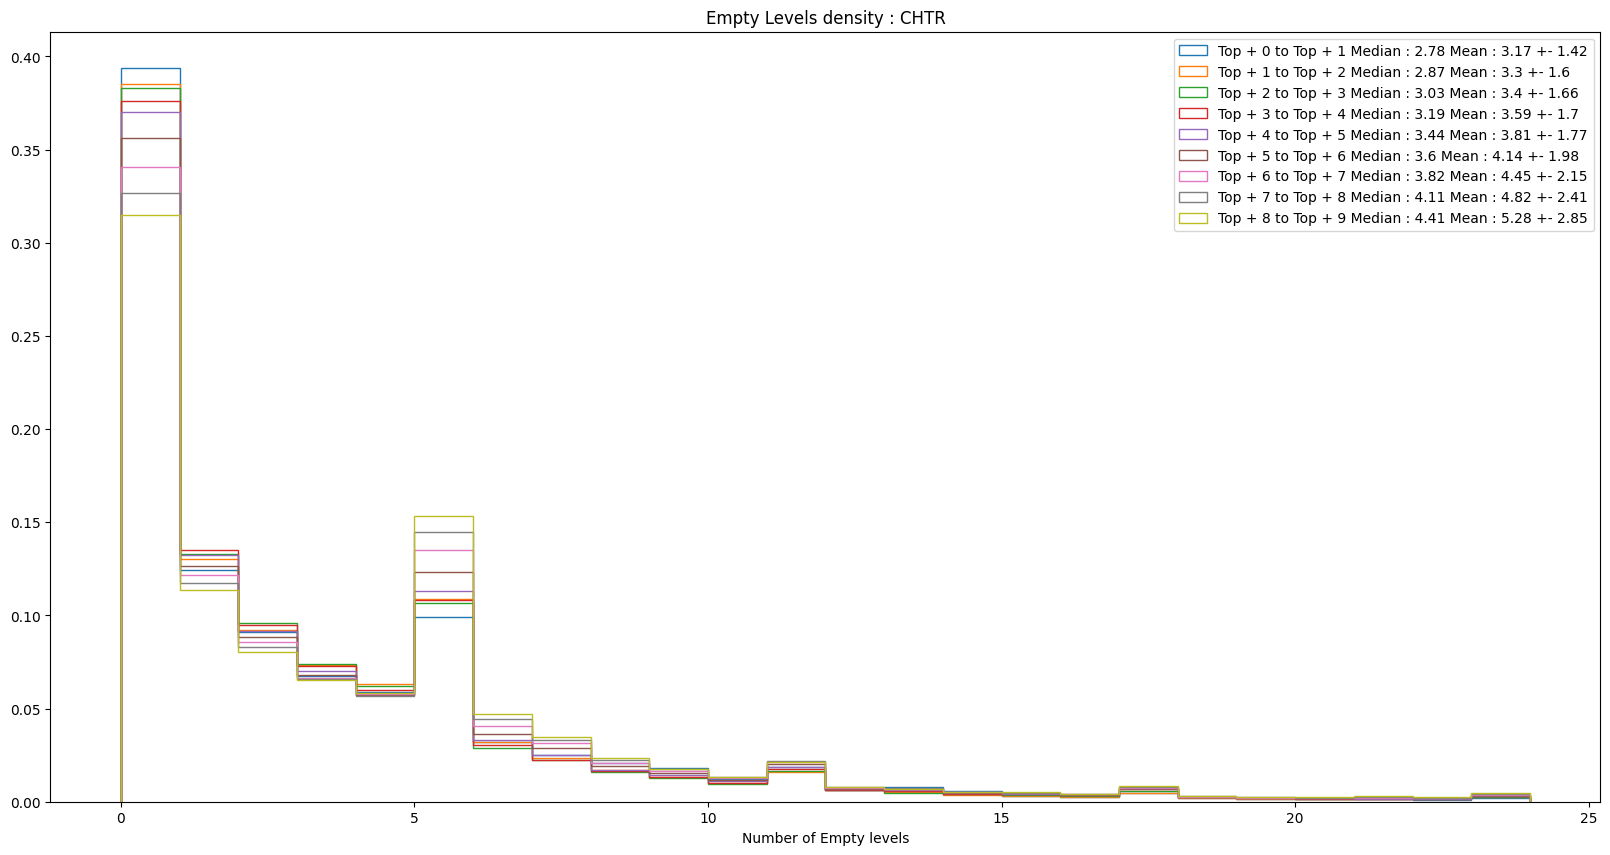

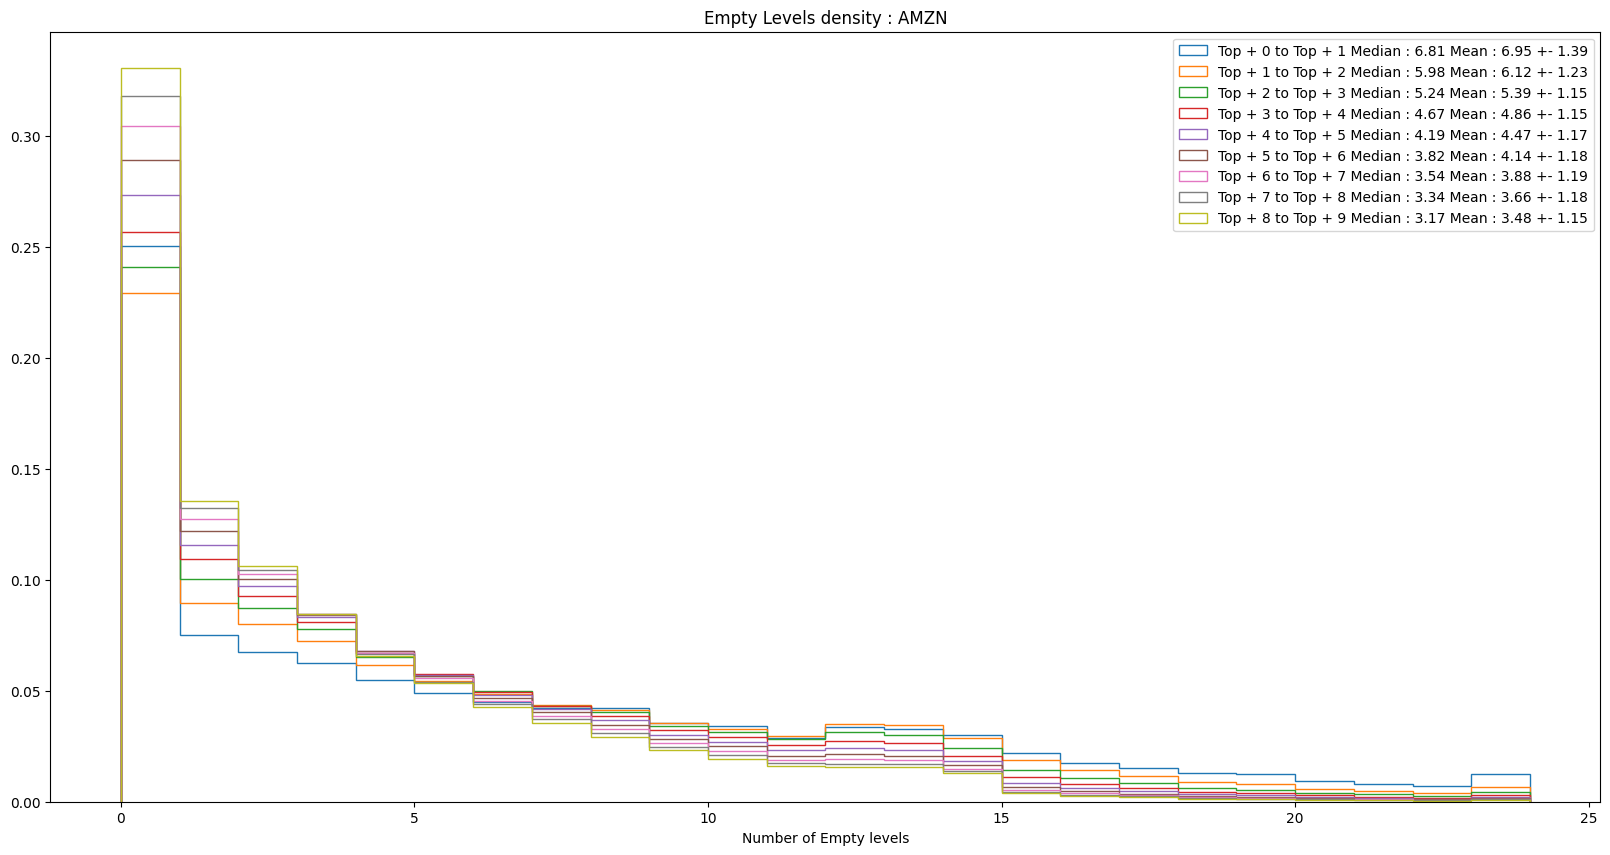

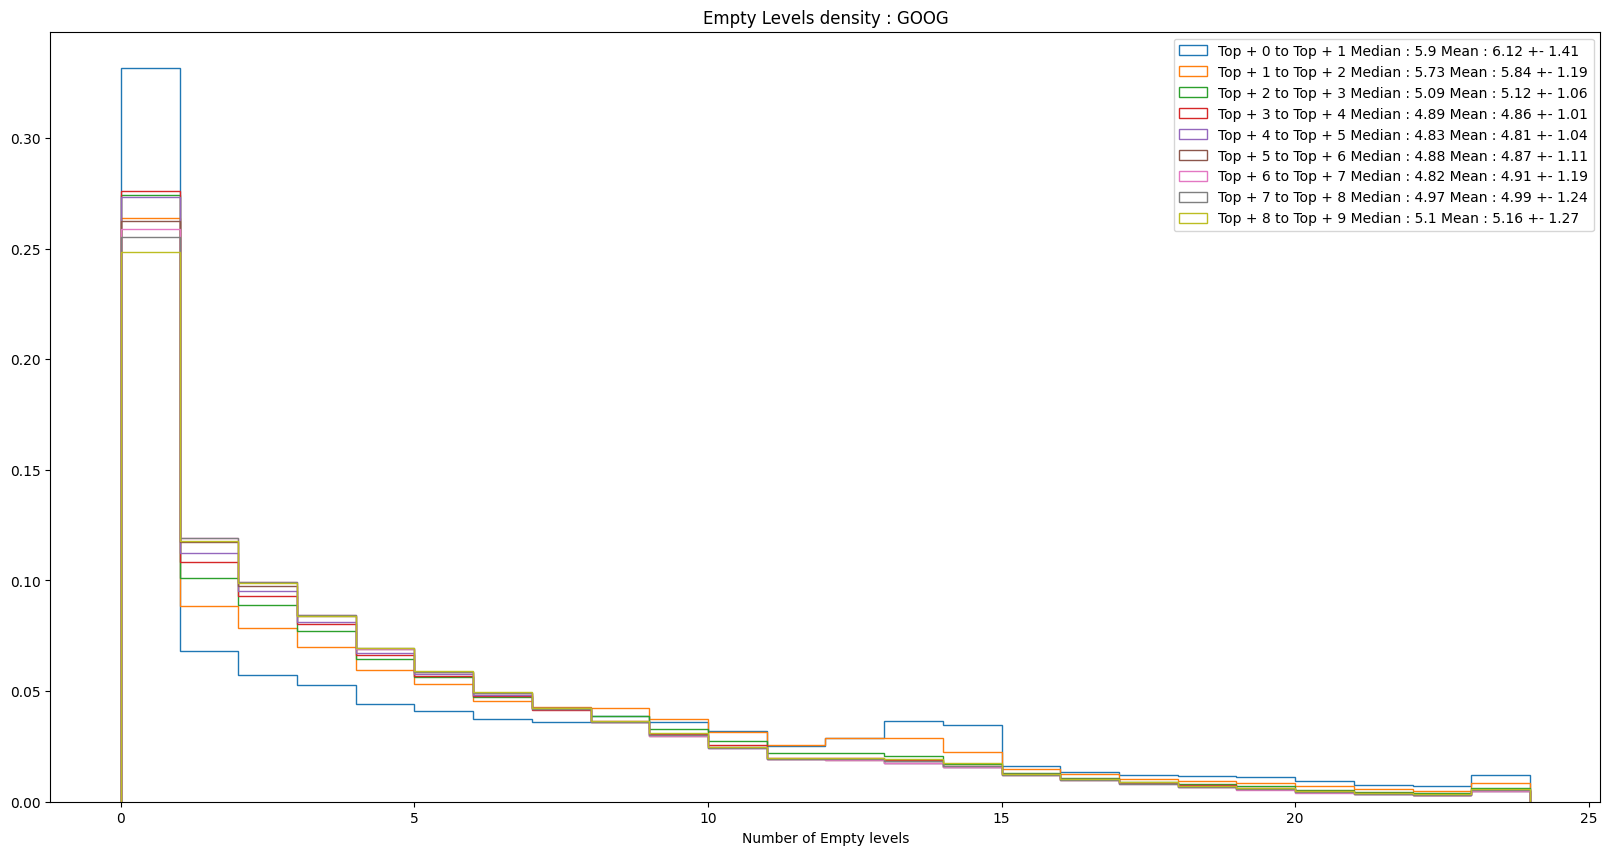

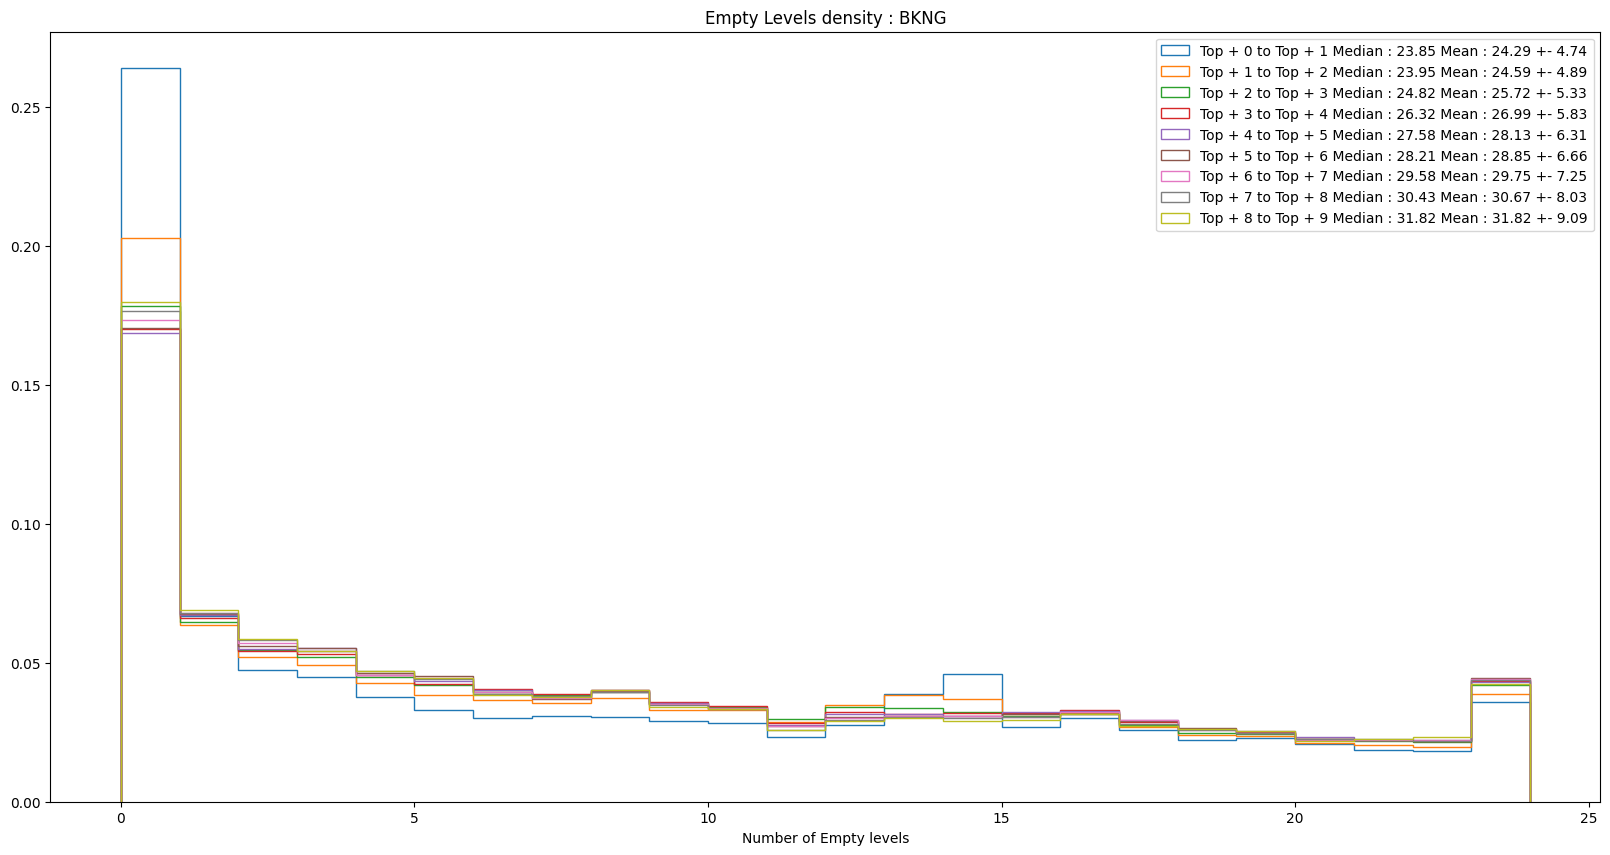

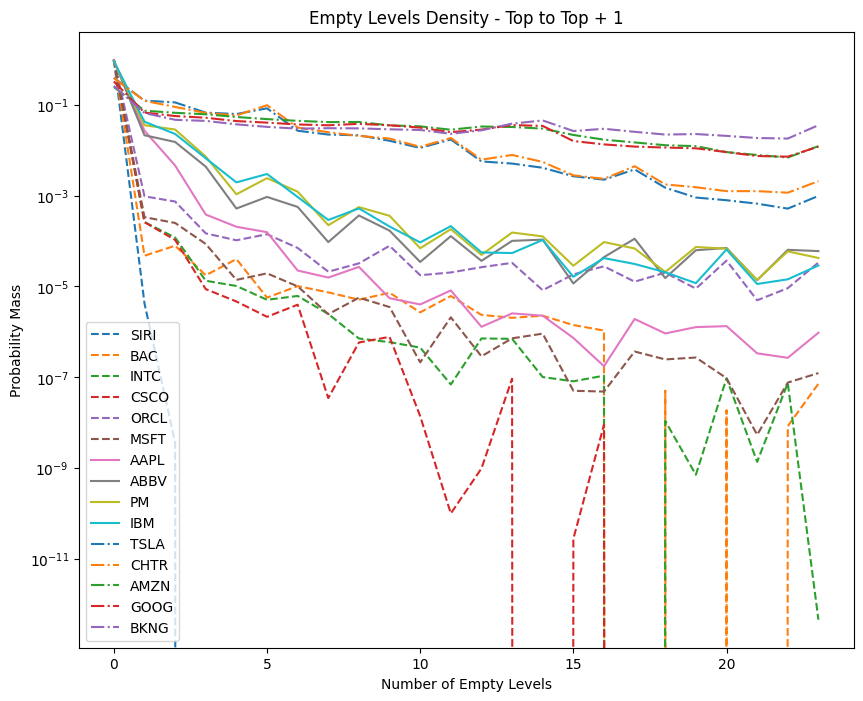

In [38]:
Xs , Ys, linestyles, labels = [], [], [] , []
for s in stocks:
    # if s in ['MSFT', 'GOOG', 'AAPL']: continue
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_SparsityDistri", "rb") as f:
        data = pickle.load(f)
    # hist, bins = np.histogram(np.abs(data[1])[np.abs(data[1]) > 0] , density=True, bins = "sqrt")
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        linestyle = "-"
    else:
        linestyle = "-."
    Xs.append(data[1][1][:-1])
    Ys.append(data[1][0])
    linestyles.append(linestyle)
    labels.append(s)
plt.figure(figsize=(10,8))
for x, y, ls, l in zip(Xs, Ys, linestyles, labels):
    plt.plot(x, y, ls, label=l)
plt.yscale("log")
# plt.xscale("log")
# plt.ylim([1e-5, 1e3])
plt.legend()
plt.ylabel("Probability Mass")
plt.xlabel("Number of Empty Levels")
plt.title("Empty Levels Density - Top to Top + 1")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_emptyLevels_2019.png")
plt.show()

In [4]:
with open("/SAN/fca/Konark_PhD_Experiments/smallTick/PM_EDA_shapeWasserstein", "rb") as f:
        data = pickle.load(f)

['SIRI', 'BAC', 'INTC', 'CSCO', 'ORCL', 'MSFT', 'AAPL', 'ABBV', 'PM', 'IBM', 'TSLA', 'CHTR', 'AMZN', 'GOOG', 'BKNG'] [0.7089503943776994, 0.7686708771904559, 0.7868141190489251, 0.7790273026762156, 0.8359131768982212, 0.911724200288629, 1.0851856688179005, 1.0713023044571468, 1.0874443324846814, 1.0771589920628202, 1.3710288131336028, 1.396555128611257, 1.4267636205983785, 1.423794593142635, 1.1938910157232747] [0.010326841378541406, 0.013524763608207143, 0.023648645714285557, 0.02457293666678937, 0.050330029725042004, 0.11313663392584818, 0.19691799435339324, 0.17339079265723267, 0.16135433333043483, 0.17324696258342048, 0.007794852298151848, 0.011135387550488967, 0.011128008848625052, 0.010700371804982267, 0.05807183931090028]


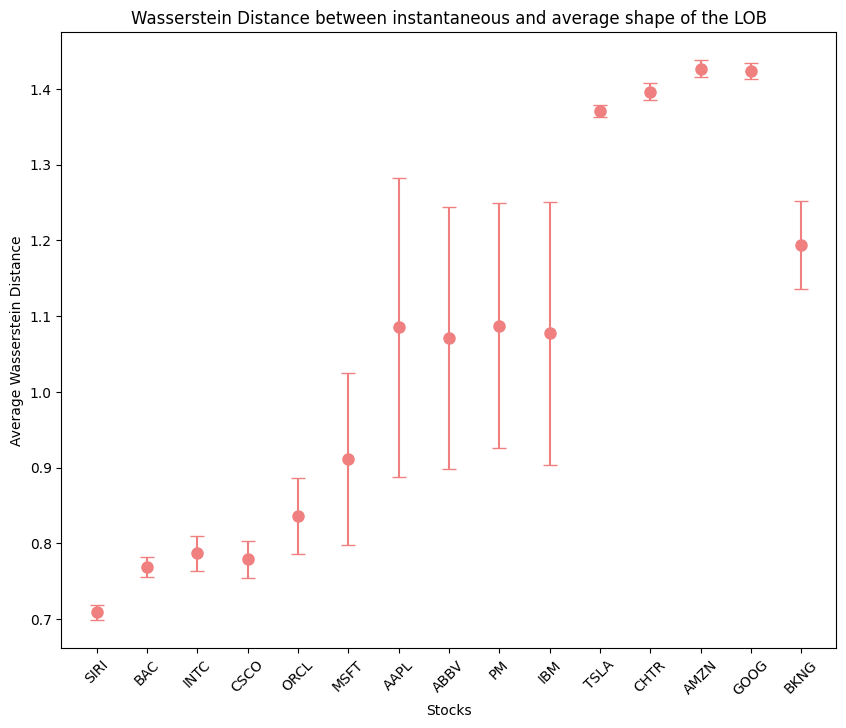

In [4]:
plt.figure(figsize=(10,8))
Xs , Ys , Es= [] , [] , []
for s in stocks:
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    try:
        with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_shapeWasserstein", "rb") as f:
            data = pickle.load(f)
    except:
        continue
    if len(data[1])==0 or np.isnan(data[1][0]): continue
    m, v = np.mean(data[0]), np.mean(data[1])
    Ys.append(m)
    Es.append(v)
    Xs.append(s)
print(Xs, Ys, Es)
plt.errorbar(np.arange(len(Xs)), Ys, yerr=Es, marker='o', markersize=8, linestyle='none', capsize=5, color = 'lightcoral')
plt.xticks(np.arange(len(Xs)), Xs, rotation=45)
# plt.yscale("log")
# plt.xscale("log")
# plt.legend(loc = "lower right")
plt.ylabel("Average Wasserstein Distance")
plt.xlabel("Stocks")
plt.title("Wasserstein Distance between instantaneous and average shape of the LOB")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_wassShape_2019.png")
plt.show()

# Liquidity

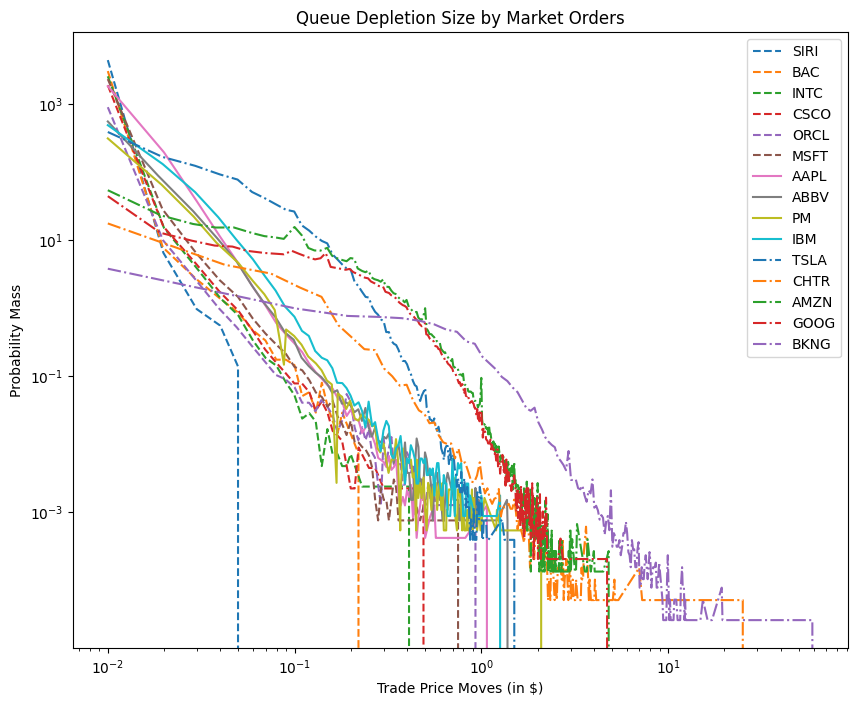

In [44]:
plt.figure(figsize=(10,8))
for s in stocks:
    # if s in ['MSFT', 'GOOG', 'AAPL']: continue
    # os.system("/share/apps/p7zip-16.02/bin/7z e /SAN/fca/DRL_HFT_Investigations/" + s + "_2019-01-01_2020-09-27_10.7z -o/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/ " + s + "_2019-* -r -y")  
    # l = dataLoader.Loader(s, dates[0], dates[0] nlevels = 1, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")
    # data = l.load()
    # os.system("rm -r /SAN/fca/Konark_PhD_Experiments/extracted/GOOG/" + s + "*")
    with open("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_EDA_MOQDs", "rb") as f:
        data = pickle.load(f)
    hist, bins = np.histogram(np.abs(data[1])[np.abs(data[1]) > 0] , density=True, bins = "sqrt")
    if s in ['SIRI','BAC', 'INTC','CSCO','ORCL','MSFT']:
        linestyle= "--"
    elif s in ['AAPL','ABBV', 'PM','IBM']:
        linestyle = "-"
    else:
        linestyle = "-."
    plt.plot(np.append(bins[:-1][hist >0], [bins[:-1][hist >0][-1]]) , np.append(hist[hist >0], [0]),  linestyle, label = s)
plt.yscale("log")
plt.xscale("log")
# plt.ylim([1e-5, 1e3])
plt.legend(loc = "upper right")
plt.ylabel("Probability Mass")
plt.xlabel("Trade Price Moves (in \$)")
plt.title("Queue Depletion Size by Market Orders")
plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/xStock_liquidity_2019.png")
plt.show()

# Leverage

In [7]:
l = dataLoader.Loader('CHTR', dt.date(2019,1,2), dt.date(2019,1,2), nlevels = 10, dataPath = "/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/")

In [8]:
data = l.load()[0]

/SAN/fca/Konark_PhD_Experiments/extracted/GOOG/CHTR_2019-01-02_34200000_57600000_message_10.csv


/home/konajain/code/lobSimulations/hawkes/dataLoader.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000


In [9]:
data['mid'] = (data['Ask Price 1'] + data['Bid Price 1'])*0.5
data['midPrev'] = data.mid.shift(1).fillna(0)
data['depth'] = np.round(100*(data.Price/10000 - data.midPrev), 2)

In [10]:
data.head()

,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,...,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10,Date,mid,midPrev,depth
1,34200.136372,6,-1,10386,2798900,-1,NaN,282.09,100,277.76,...,263.21,100,298.88,300,261.85,300,2019-01-02,279.925,0.000,27989.0
2,34200.136372,1,3629749,25,2791100,1,NaN,282.09,100,279.11,...,264.58,300,298.88,300,263.21,100,2019-01-02,280.600,279.925,-81.5
3,34200.136372,1,4463669,100,2839000,-1,NaN,282.09,100,279.11,...,264.58,300,297.47,100,263.21,100,2019-01-02,280.600,280.600,330.0
4,34200.136372,1,2866357,18,2790000,1,NaN,282.09,100,279.11,...,265.02,300,297.47,100,264.58,300,2019-01-02,280.600,280.600,-160.0
5,34200.136372,1,6794281,10,2850000,-1,UBSS,282.09,100,279.11,...,265.02,300,297.42,100,264.58,300,2019-01-02,280.600,280.600,440.0


In [11]:
data = data.loc[data['Type'] < 5]
data = data.loc[data['Type'] !=2]
data['depthAbs'] = data['depth'].apply(lambda x: np.round(np.abs(x), 2))
uncondProb = (data.groupby(['Type','depth'])['Time'].count()/len(data))

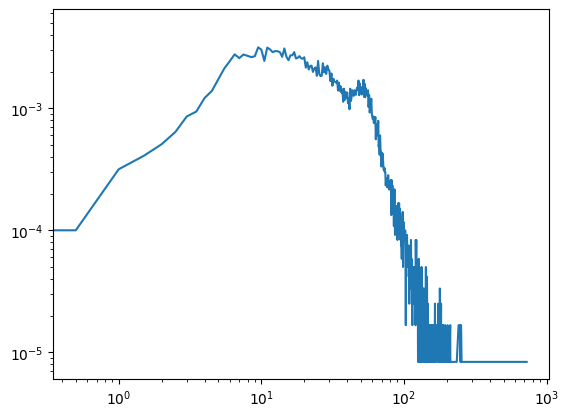

In [12]:
plt.plot(uncondProb[3])
plt.yscale('log')
plt.xscale('log')

In [13]:
uncondProb

Type  depth 
1     -898.0    0.000017
      -860.0    0.000008
      -673.5    0.000008
      -592.0    0.000008
      -581.0    0.000008
                  ...   
4      34.5     0.000042
       35.5     0.000017
       39.5     0.000017
       41.0     0.000008
       43.5     0.000008
Name: Time, Length: 1688, dtype: float64

## immediate next event

In [15]:
converter ={ 1: 0, 3: 1, 4:2}
depthMax = int(np.max(data['depthAbs']))
matrix = np.zeros((int(depthMax*3*2), int(depthMax*3*2)))
data['TypeDepth'] = data['Type'].astype(int).astype(str) +  data['depth'].astype(int).astype(str)
data['TypeDepth_1'] = data['TypeDepth'].shift(1)
data.head()

,Time,Type,OrderID,Size,Price,TradeDirection,tmp,Ask Price 1,Ask Size 1,Bid Price 1,...,Ask Size 10,Bid Price 10,Bid Size 10,Date,mid,midPrev,depth,depthAbs,TypeDepth,TypeDepth_1
2,34200.136372,1,3629749,25,2791100,1,NaN,282.09,100,279.11,...,300,263.21,100,2019-01-02,280.6,279.925,-81.5,81.5,1-81,NaN
3,34200.136372,1,4463669,100,2839000,-1,NaN,282.09,100,279.11,...,100,263.21,100,2019-01-02,280.6,280.600,330.0,330.0,1330,1-81
4,34200.136372,1,2866357,18,2790000,1,NaN,282.09,100,279.11,...,100,264.58,300,2019-01-02,280.6,280.600,-160.0,160.0,1-160,1330
5,34200.136372,1,6794281,10,2850000,-1,UBSS,282.09,100,279.11,...,100,264.58,300,2019-01-02,280.6,280.600,440.0,440.0,1440,1-160
6,34200.136372,1,6333545,20,2750000,1,NaN,282.09,100,279.11,...,100,265.02,300,2019-01-02,280.6,280.600,-560.0,560.0,1-560,1440


In [101]:
condCounts = data.groupby(['TypeDepth','TypeDepth_1'])['Time'].count()
uncondCounts = data.groupby(['TypeDepth'])['Time'].count()
uncondCounts

TypeDepth
1-1      330
1-10     898
1-100      3
1-101     10
1-102      7
        ... 
45       191
46       208
47       193
48       166
49       187
Name: Time, Length: 1009, dtype: int64

TypeDepth  TypeDepth_1
1-1        1-1              2
           1-10             6
           1-11            10
           1-12             2
           1-13             6
                         ... 
49         373              2
           39               4
           47               2
           48              14
           49             174
Name: Time, Length: 46068, dtype: int64

In [47]:
condProb = condCounts/uncondCounts
uncondProb = uncondCounts/uncondCounts.sum()
leverage = condProb/uncondProb
leverage = leverage.reset_index()
leverage

,TypeDepth,TypeDepth_1,Time
0,1-1,1-1,1.102259
1,1-1,1-10,3.306777
2,1-1,1-11,5.511295
3,1-1,1-12,1.102259
4,1-1,1-13,3.306777
...,...,...,...
46063,49,373,3.432640
46064,49,39,6.865281
46065,49,47,3.432640
46066,49,48,24.028482


In [48]:
leverage[['Type','Depth']]= np.stack(leverage['TypeDepth'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)
leverage[['Type_1','Depth_1']]= np.stack(leverage['TypeDepth_1'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)

In [49]:
leverageOrig = leverage.copy()
leverageOrig

,TypeDepth,TypeDepth_1,Time,Type,Depth,Type_1,Depth_1
0,1-1,1-1,1.102259,1,-1,1,-1
1,1-1,1-10,3.306777,1,-1,1,-10
2,1-1,1-11,5.511295,1,-1,1,-11
3,1-1,1-12,1.102259,1,-1,1,-12
4,1-1,1-13,3.306777,1,-1,1,-13
...,...,...,...,...,...,...,...
46063,49,373,3.432640,4,9,3,73
46064,49,39,6.865281,4,9,3,9
46065,49,47,3.432640,4,9,4,7
46066,49,48,24.028482,4,9,4,8


In [71]:
depthMax = int(np.max(leverageOrig.Depth.apply(np.abs)))
leverage = leverageOrig.set_index(['Type_1','Depth_1','Type', 'Depth'])
matrix = np.zeros((int(depthMax*3*2), int(depthMax*3*2)))
converter ={  0: 1, 1: 3,  2: 4}
for i in range(depthMax*3*2):
    type_i = converter[i//(depthMax*2)]
    depth_i = i%(depthMax*2)  - depthMax
    for j in range(depthMax*3*2):
        type_j = converter[j//(depthMax*2)]
        depth_j = j%(depthMax*2)  - depthMax
        if (int(type_i), int(depth_i), int(type_j), int(depth_j)) in leverage.index: 
            matrix[i, j] = leverage.loc[(int(type_i), int(depth_i), int(type_j), int(depth_j))]['Time']
plt.imshow(matrix, cmap='binary')

KeyboardInterrupt: 

In [78]:
np.where(matrix>0)

(array([ 242,  280,  467, ..., 2874, 2890, 2897]),
 array([1704,  242, 3562, ..., 3323,  610, 3642]))

## Grouping 

In [205]:
with open('/SAN/fca/Konark_PhD_Experiments/smallTick/BKNG_EDA_leverage', 'rb') as f:
    dict_res = pickle.load(f)

In [206]:
condCounts, uncondCounts = dict_res['condCounts'], dict_res['uncondCounts']

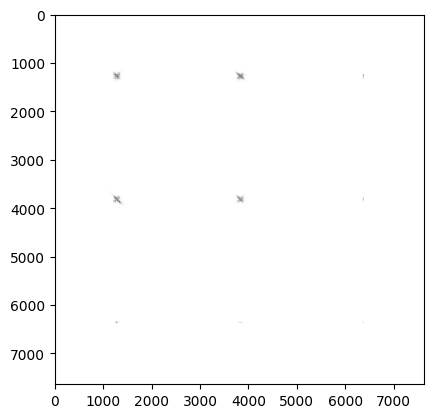

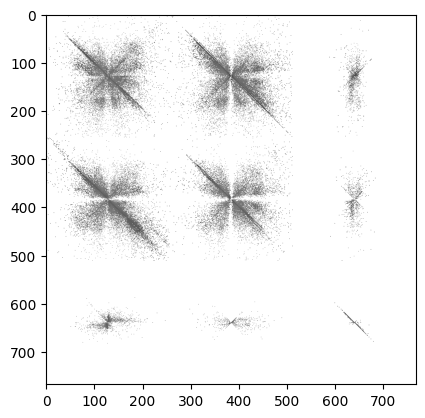

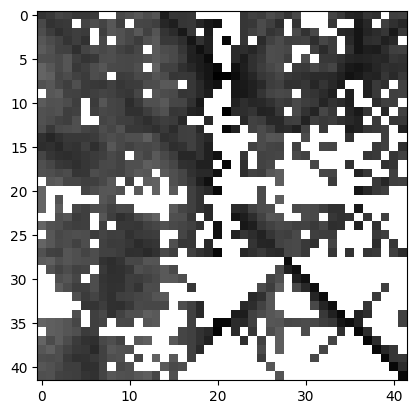

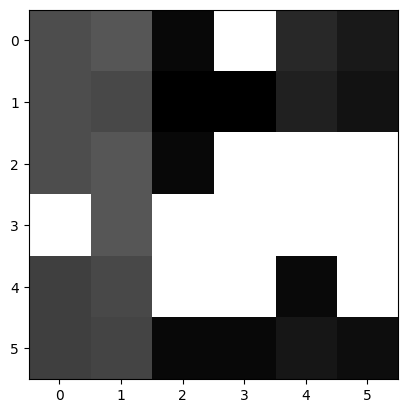

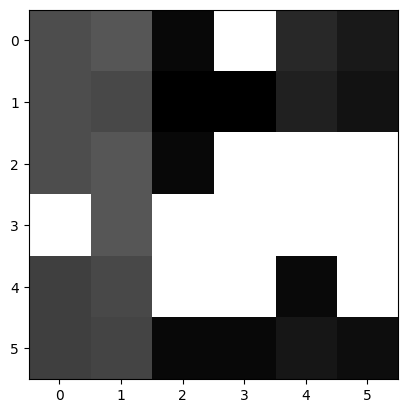

In [207]:
depthMax = uncondCounts.reset_index()['TypeDepth'].apply(lambda x: np.abs(int(x[1:]))).median()
for stepsize in [1,5,10,15,20,25]:
    
    categories = np.arange(-1*depthMax,depthMax, stepsize)
    condCounts_categorized = condCounts.reset_index().copy()
    condCounts_categorized['cat'] = condCounts_categorized['TypeDepth'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    condCounts_categorized['cat_1'] = condCounts_categorized['TypeDepth_1'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    uncondCounts_categorized = uncondCounts.reset_index().copy()
    uncondCounts_categorized['cat'] = uncondCounts_categorized['TypeDepth'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    condCounts_categorized = condCounts_categorized.groupby(['cat','cat_1'])['Time'].sum()
    uncondCounts_categorized = uncondCounts_categorized.groupby('cat')['Time'].sum()
    condProb_categorized = condCounts_categorized/uncondCounts_categorized
    uncondProb_categorized = uncondCounts_categorized/uncondCounts_categorized.sum()
    leverage_categorized = condProb_categorized/uncondProb_categorized
    leverage_categorized = leverage_categorized.reset_index()
    leverage_categorized[['Type','Depth']]= np.stack(leverage_categorized['cat'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)
    leverage_categorized[['Type_1','Depth_1']]= np.stack(leverage_categorized['cat_1'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)
    depthMax = int(np.max(leverage_categorized.Depth.apply(np.abs)))
    leverage_categorized = leverage_categorized.set_index(['Type_1','Depth_1','Type', 'Depth'])
    matrix = np.zeros((int(depthMax*3*2), int(depthMax*3*2)))
    converter ={  0: 1, 1: 3,  2: 4}
    for i in range(depthMax*3*2):
        type_i = converter[i//(depthMax*2)]
        depth_i = i%(depthMax*2)  - depthMax
        for j in range(depthMax*3*2):
            type_j = converter[j//(depthMax*2)]
            depth_j = j%(depthMax*2)  - depthMax
            if (int(type_i), int(depth_i), int(type_j), int(depth_j)) in leverage.index: 
                matrix[i, j] = leverage.loc[(int(type_i), int(depth_i), int(type_j), int(depth_j))]['Time']
    plt.figure()
    plt.imshow(np.log(matrix+1e-6), cmap='binary')

573.0
[-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17]


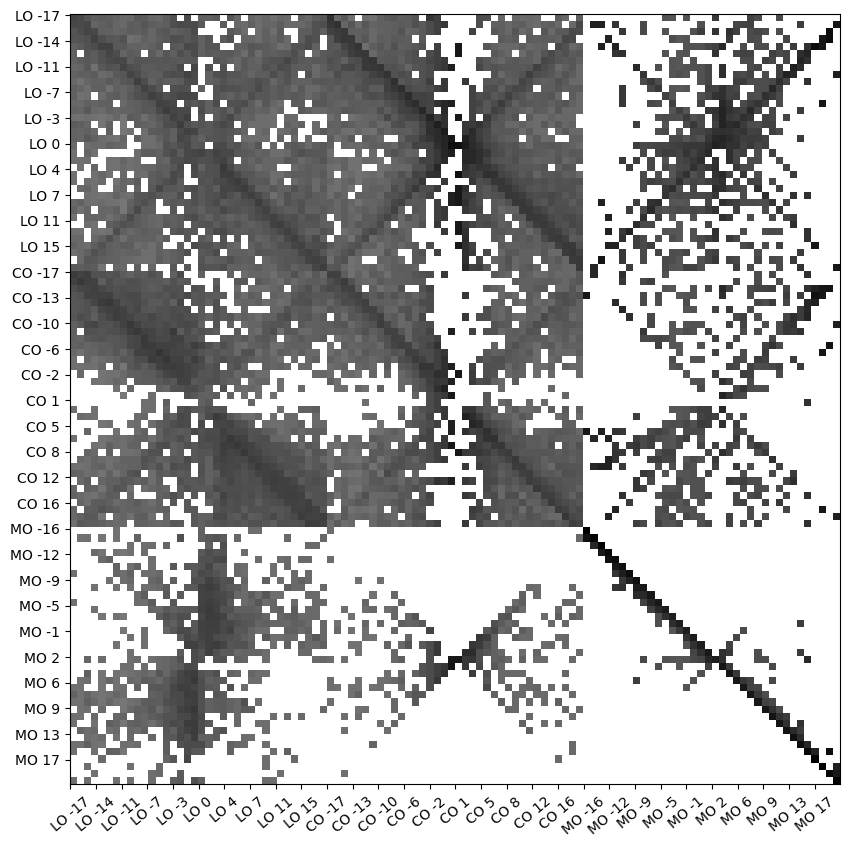

In [289]:
for s in ['SIRI']:
    with open('/SAN/fca/Konark_PhD_Experiments/smallTick/'+s+'_EDA_leverage', 'rb') as f:
        dict_res = pickle.load(f)
    condCounts, uncondCounts = dict_res['condCounts'], dict_res['uncondCounts']
    depthMax = uncondCounts.reset_index()['TypeDepth'].apply(lambda x: np.abs(int(x[1:]))).median()
    print(depthMax)
    depthMax= 18
    categories = np.append(-1*np.logspace(np.log(depthMax)/np.log(10),0,50), np.append([0],np.logspace(0,np.log(depthMax)/np.log(10), 50)))
    categories =np.unique(categories.astype(int))
    print(categories)
    condCounts_categorized = condCounts.reset_index().copy()
    condCounts_categorized['cat'] = condCounts_categorized['TypeDepth'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    condCounts_categorized['cat_1'] = condCounts_categorized['TypeDepth_1'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    uncondCounts_categorized = uncondCounts.reset_index().copy()
    uncondCounts_categorized['cat'] = uncondCounts_categorized['TypeDepth'].apply(lambda x : x[0]+ str((-len(categories)//2) + np.searchsorted(categories, int(x[1:]))))
    condCounts_categorized = condCounts_categorized.groupby(['cat','cat_1'])['Time'].sum()
    uncondCounts_categorized = uncondCounts_categorized.groupby('cat')['Time'].sum()
    condProb_categorized = condCounts_categorized/uncondCounts_categorized
    uncondProb_categorized = uncondCounts_categorized/uncondCounts_categorized.sum()
    leverage_categorized = condProb_categorized/uncondProb_categorized
    leverage_categorized = leverage_categorized.reset_index()
    leverage_categorized[['Type','Depth']]= np.stack(leverage_categorized['cat'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)
    leverage_categorized[['Type_1','Depth_1']]= np.stack(leverage_categorized['cat_1'].apply(lambda x: np.array([int(x[0]) , int(x[1:])])).values)
    # depthMax = int(np.max(leverage_categorized.Depth.apply(np.abs)))
    leverage_categorized = leverage_categorized.set_index(['Type_1','Depth_1','Type', 'Depth'])
    matrix = np.zeros((int(depthMax*3*2), int(depthMax*3*2)))
    converter ={  0: 1, 1: 3,  2: 4}
    for i in range(int(depthMax*3*2)):
        type_i = converter[i//(depthMax*2)]
        depth_i = i%(depthMax*2)  - depthMax
        for j in range(int(depthMax*3*2)):
            type_j = converter[j//(depthMax*2)]
            depth_j = j%(depthMax*2)  - depthMax
            if (int(type_i), int(depth_i), int(type_j), int(depth_j)) in leverage.index:
                matrix[i, j] = leverage.loc[(int(type_i), int(depth_i), int(type_j), int(depth_j))]['Time']
    plt.figure(figsize=(10,10))
    plt.imshow(np.log(matrix+1e-6), cmap='binary')
    locs = np.linspace(0, len(matrix), num = 31) - 4
    labels = []
    for x, y in zip( np.array(["LO"]*10 + ["CO"]*10 + ["MO"]*10) , np.array([" " + str(int(x)) for x in np.array(list(categories)*3)[[int(x) for x in (locs[1:])]]])):
        labels.append(x+y)
    plt.xticks(ticks = locs[1:], labels = labels, rotation=40)
    plt.yticks(ticks = locs[1:] ,labels = labels)
    plt.savefig("/SAN/fca/Konark_PhD_Experiments/smallTick/"+s+"_leverage_2019.png")

In [285]:
depthMax

18

## 1 second 

In [79]:
t = data['Time'].loc[12]
slice = data.loc[(data['Time'] <= t+1)&(data['Time'] >= t)&(data.index > 12)]

In [80]:
depthMax = np.max(data['depthAbs'])

In [82]:
dataOrig = data.copy()

In [115]:
converter ={ 1: 0, 3: 1, 4:2}
depthMax = int(np.max(data['depthAbs']))
matrix = np.zeros((int(depthMax*3*2), int(depthMax*3*2)))
for i in data.index:
    t = data['Time'].loc[i]
    id = (converter[data['Type'].loc[i]], int(data['depth'].loc[i]))
    slice = data.loc[(data['Time'] <= t+1)&(data['Time'] >= t)&(data.index > i)]
    slice = slice.groupby(['Type','depth'])['Time'].count().to_dict()
    matrix[id[0]*depthMax*2 + id[1] + depthMax, [converter[x[0]]*depthMax*2 + int(x[1]) + depthMax for x in list(slice.keys())]] += list(slice.values())

In [122]:
np.nanmax(matrix/np.sum(matrix, axis=0))

/tmp/ipykernel_63778/493785589.py:1: RuntimeWarning: invalid value encountered in divide
  np.nanmax(matrix/np.sum(matrix, axis=0))


1.0

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(np.nan_to_num(matrix/np.sum(matrix, axis=0)), cmap='hot', interpolation='nearest' )

/tmp/ipykernel_63778/765638788.py:2: RuntimeWarning: invalid value encountered in divide
  plt.imshow(np.nan_to_num(matrix/np.sum(matrix, axis=0)), cmap='hot', interpolation='nearest' )


In [134]:
np.nan_to_num(matrix/np.sum(matrix, axis=0))

/tmp/ipykernel_63778/2462875670.py:1: RuntimeWarning: invalid value encountered in divide
  np.nan_to_num(matrix/np.sum(matrix, axis=0))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

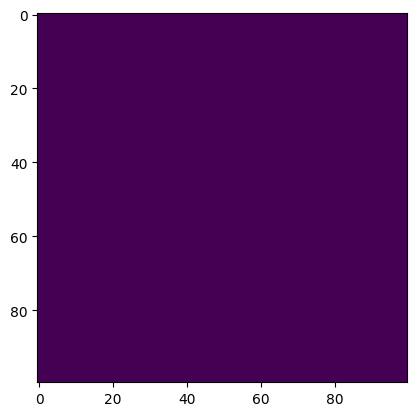

In [136]:
plt.imshow(np.ones((100,100))*0.5)

In [24]:
with open("D:\\PhD\\results - small tick\\TSLA_EDA_leverageIS_top", 'rb') as f:
    dictRes = pickle.load(f)

TypeError: Argument 'placement' has incorrect type (expected pandas._libs.internals.BlockPlacement, got slice)